# Week 4 - Exploring Semantic Spaces (Word Embeddings)
This week, we build on last week's topic modeling techniques by taking a text corpus we have developed, specifying an underlying number of dimensions, and training a model with a neural network auto-encoder (one of Google's word2vec  algorithms) that best describes corpus words in their local linguistic contexts, and exploring their locations in the resulting space to learn about the discursive culture that produced them.

This is our third document representation we have learned: First, we used word counts. Second, we used LDA topic models built around term coocurrence in the same document (i.e., a "bag of words"). Third, documents here are represented as densely indexed locations in dimensions, so that distances between those documents (and words) contain more information, though they require the full vector of dimension loadings (rather than just a few selected topic loadings) to describe. We will explore these spaces to understand complex, semantic relationships between words, index documents with descriptive words, identify the likelihood that a given document would have been produced by a given vector model, and explore how semantic categories can help us understand the cultures that produced them.

Note that most modern natural language processing (NLP) research, at least in computer science, uses word embeddings. This is the foundation of most state-of-the-art models.

Also note that the code in this Notebook can take many minutes or even hours to run. This is the case for most NLP research these days, and it's a good opportunity to start thinking about how to manage high-compute workloads, such as running code on small samples to test it, loading datafiles in [chunks](https://stackoverflow.com/a/25962187), or [multiprocessing](https://en.wikipedia.org/wiki/Multiprocessing).

## <font color="red">*Pitch Your Project*</font>

<font color="red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

# ***What?***
<font color="darkblue">I plan to analyze reviews on Steam (store.steampowered.com) to learn about game consumers' attitudes in this large online marketplace, as well as the games that they are reviewing. I intend to generalize this analysis to the online game market in general, and analyze components of the game market (e.g., different genres of games, different developers, and so on). The reviews and games will be selected pseudo-randomly, such that the analysis isn't biased but is feasible (not, for instance, sampling games with fewer than ten reviews). I will primarily focus on relevant reviews (i.e., not those containing content irrelevant to the game in question). Further specification regarding the types of reviews and games are admittedly still a work in progress.

## ***Why?***
<font color="darkblue">The benefits would be pretty atheoretical, though suggestions for the generality of various marketing theories might be posed as a result of the analyses. For the most part, the benefits would be to developers of games and game consumers, dealing with the kinds of impacts of game reviews on the potential development of games. For instance, if consumers generally leave one type of review (say, technical reviews) on one genre of game (say, first-person shooters), then it is plausible that developers in this space would focus more on technical details of their games (rather than developing other things, like expanding the amount of content). That, or certain kinds of consumers are drawn to certain genres of games (in this example, those who appreciate technical details over content), in which case the focus on certain details would be wise. At the very least, my findings would provide valuable suggestions to guide research on incentives in the online game market, to better understand developers' and consumers' decisions.

## ***How?***
<font color="darkblue">This is also a work-in-progress. I think I'd start with analyzing game reviews in general, to gauge the most common content irrespective of other factors (like game genre). This would set a baseline to compare against. Then, I would subset by game genre and do the same general analysis (then repeat with game popularity). In all cases, the analyses would be generating WordClouds, word frequencies of keywords (for answering my questions, things like "content" and "frames") as well as the most frequent words, bigrams to disembiguate word frequency results, kmeans clustering (with labels), sentiment scores, and parse trees (to gauge review complexity). I would also look at topic models (basically, trees) of different review content to analyze (at least qualitatively) the centrality of various review content for different games. Next, I would analyze differences between types of games (based on genre/popularity) based on KL divergence and MDS visualization. Although not central, I would also like to do dynamic modeling, looking at how reviews differ over time or, perhaps more relevantly, how differences between games differ over time. Based on the results of these analyses, I will either refine them (such that they are clearer or more focused on answering questions), discard them (for being more-or-less useless), or add in new corpora (e.g., steamcharts.com data for player counts at different time points, or the GameDeals subreddit to gather time points for price promotions, to see how they affect the number of reviews and review quality/content, in line with my original research topic). Yucan also reached out to work with me, so it'd be up to what he wants to look at too.

## <font color="red">*Pitch Your Sample*</font>

<font color="red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

## ***Which (words)?***
<font color="darkblue">Steam is the largest online game retailer, so using their data makes sense for generalization and getting maximal data (so my assumptions can be weaker, in accordance with the readings/lecture). However, Epic Games is another online game retailer with more systematic and clear-cut free price promotions (if I care about that), making it a great alternative to Steam data if need be. In fact, forming a theory based on the Steam data and checking its robustness with the Epic Games market would help with scaling up. Fortunately, Steam data is well-reported, so I don't have to worry about bias there, but free price promotion reporting on Reddit could be biased to popular games, so I'll have to be careful there (if I choose to use that). Steam and Epic Games are the only serious online game retailers, so making inferences about game consumers and developers is only sensible on these websites. Steam's advantage is the fact that it's been around longer, is more popular, and has easier access to text data (an API allows for it). It also has more integration with online games, which has caused it (rather than other services) to be used in prior research, so it'd be easier to align my work with prior work by using Steam.

In [1]:
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-3s5dnm94
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-3s5dnm94
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [31]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

# Getting our corpora

Instead of downloading our corpora, we have download them in advance; a subset of the [senate press releases](https://github.com/lintool/GrimmerSenatePressReleases) are in `grimmerPressReleases`. We will load them into a DataFrame, but first we need to define a function to convert directories of text files into DataFrames:

In [ ]:
def loadDir(targetDir, category):
    allFileNames = os.listdir(targetDir)
    #We need to make them into usable paths and filter out hidden files
    filePaths = [os.path.join(targetDir, fname) for fname in allFileNames if fname[0] != '.']

    #The dict that will become the DataFrame
    senDict = {
        'category' : [category] * len(filePaths),
        'filePath' : [],
        'text' : [],
    }

    for fPath in filePaths:
        with open(fPath) as f:
# Try this line instead if you get an encoding error.
#         with open(fPath, encoding="ISO-8859-1") as f:
            senDict['text'].append(f.read())
            senDict['filePath'].append(fPath)

    return pd.DataFrame(senDict)

In [ ]:
# Here I mount google drive. I stored all the data in the drive so I can extract data file directly from there. If you don't want to use the drive,
# you can always upload the data to /content/ directly.
# We recommend drive for the larger datasets.

from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/TA_file_2024_CCA')

Mounted at /content/drive


Now we can use the function in all the directories in `data/grimmerPressReleases`. If you are on Google Colab, note that rather than downloading GitHub data to your local machine and then uploading it to Drive, you can more quickly `git clone` directly to Colab, such as `!git clone https://github.com/lintool/GrimmerSenatePressReleases.git /drive/MyDrive/`, which then makes your `dataDir = 'drive/MyDrive/grimmerPressReleases/raw'`.

In [ ]:
#dataDir = 'content/drive/MyDrive/grimmerPressReleases/raw'
dataDir = 'grimmerPressReleases/grimmerPressReleases'

senReleasesDF = pd.DataFrame()

for senatorName in [d for d in os.listdir(dataDir) if d[0] != '.']:
    senPath = os.path.join(dataDir, senatorName)
    senReleasesDF = senReleasesDF.append(loadDir(senPath, senatorName), ignore_index = True)

senReleasesDF[:100:10]

,category,filePath,text
0,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...
10,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...
20,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...
30,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...
40,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...
50,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...
60,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...
70,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...
80,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...
90,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...


Word2Vec needs to retain the sentence structure so as to capture a "continuous bag of words (CBOW)" and all of the skip-grams within a word window. The algorithm tries to preserve the distances induced by one of these two local structures. This is very different from clustering and LDA topic modeling which extract unordered words alone.

When we normalize here, we don't use the lematized form of the word because we might lose information. Note the paramter in the normalize tokens function.

In [ ]:
#Apply our functions, notice each row is a list of lists now
from tqdm import tqdm
tqdm.pandas()

senReleasesDF['tokenized_sents'] = senReleasesDF['text'].progress_apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
# With the latest spacy versions, you may get warnings with the following line of code. See the discussion here: https://github.com/allenai/allennlp/issues/5036
# senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

senReleasesDF[:100:10]

100%|██████████| 3904/3904 [08:03<00:00,  8.08it/s]
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


,category,filePath,text,tokenized_sents,normalized_sents
0,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 08, 09, 2005], [John, Kerry, Says,...","[[releases], [john, kerry, says, energy, polic..."
10,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 01, 19, 2006, Statement, by, Senat...","[[releases, statement, senator, john, kerry, k..."
20,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 10, 04, 2007, Kerry, Honors, Bille...","[[releases, kerry, honors, billerica, woman, a..."
30,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 10, 23, 2007, Senators, Kerry, Ken...","[[releases, senators, kerry, kennedy, salazar,..."
40,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 03, 29, 2005, Leading, health, car...","[[releases, leading, health, care, children, s..."
50,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 03, 02, 2005, Working, to, Strenth...","[[releases, working, strenthen, american, mili..."
60,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 05, 31, 2005, Statement, from, Joh...","[[releases, statement, john, kerry, governor, ..."
70,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 09, 27, 2007, Kerry, Kennedy, anno...","[[releases, kerry, kennedy, announce, billeric..."
80,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 08, 01, 2005, Statement, by, John,...","[[releases, statement, john, kerry, recess, ap..."
90,Kerry,grimmerPressReleases/grimmerPressReleases/Kerr...,Releases ...,"[[Releases, 11, 01, 2007, Kerry, Statement, on...","[[releases, kerry, statement, mukasey, nominat..."


# Word2Vec

We will be using the gensim implementation of [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec). Note that newer versions of gensim have different syntax, but if you're using a newer version, you should see informative error messages (e.g., replace `senReleasesW2V['president'][:10]` with `senReleasesW2V['president'].wv[:10]`). The following lines should work out-of-the-box on Google Colab.

To load our data our data we give all the sentences to the trainer:

In [ ]:
# The sg=0 argument indicates that we don't want to use "skipgram" but instead "CBOW"
senReleasesW2V = gensim.models.word2vec.Word2Vec(senReleasesDF['normalized_sents'].sum(), sg=0)

Inside the word2vec object, each word has a vector. To access the vector directly, use the square braces (`__getitem__`) method:

In [ ]:
senReleasesW2V.wv['president'][:10] #Shortening because it's very large

array([-2.914853  , -0.35330814, -0.6453861 , -2.8731003 ,  2.14102   ,
        0.78152764, -0.8469779 ,  0.45678326, -2.3338232 ,  2.4808023 ],
      dtype=float32)

If you want the full matrix, `syn0` stores all the vectors:

In [ ]:
senReleasesW2V.wv.vectors

array([[ 4.0722853e-01,  7.7914441e-01,  1.5935795e+00, ...,
        -1.7770790e+00,  4.6485770e-01,  8.6101502e-01],
       [-4.8572958e-01, -6.4862645e-01,  1.0653816e+00, ...,
        -8.4975326e-01, -7.8026962e-01, -1.3037756e-01],
       [-7.5451769e-02, -2.8315139e-01, -1.0252775e+00, ...,
        -4.8215795e-01,  2.3628895e+00,  5.6145573e-01],
       ...,
       [-1.3535589e-01,  2.9870862e-02,  4.4650625e-02, ...,
        -6.6517942e-02,  1.1277579e-03,  1.2661597e-01],
       [-2.5809275e-02,  3.1026212e-02,  3.2309644e-02, ...,
        -3.9076198e-02,  7.7305883e-03,  7.0386447e-02],
       [-5.1991539e-03,  2.7285300e-02,  4.4292949e-02, ...,
        -1.5136875e-03, -1.8800158e-02,  3.9049923e-02]], dtype=float32)

Then, `index2word` lets you translate from the matrix to words:

In [ ]:
senReleasesW2V.wv.index_to_key[10]

'american'

Now we can look at a few things that come from the word vectors. The first is to find similar vectors (cosine similarity):

In [ ]:
senReleasesW2V.wv.most_similar('president')

[('administration', 0.7762889862060547),
 ('presidents', 0.7548879384994507),
 ('administrations', 0.695731520652771),
 ('cheney', 0.638484537601471),
 ('linean', 0.5703231692314148),
 ('veto', 0.5696533918380737),
 ('ronald', 0.5443770885467529),
 ('quoting', 0.5377044081687927),
 ('rollback', 0.5196364521980286),
 ('george', 0.5150631070137024)]

In [ ]:
senReleasesW2V.wv.most_similar('war')

[('wars', 0.6631708741188049),
 ('foment', 0.6407153010368347),
 ('afghanistan', 0.63011234998703),
 ('disobedience', 0.628577470779419),
 ('unresisted', 0.6222046613693237),
 ('chaos', 0.610602080821991),
 ('sliding', 0.6074034571647644),
 ('democratization', 0.6028963327407837),
 ('militarily', 0.5897342562675476),
 ('invasion', 0.5866850018501282)]

Find which word least matches the others within a word set (cosine similarity):

In [ ]:
senReleasesW2V.wv.doesnt_match(['administration', 'administrations', 'presidents', 'president', 'washington'])

'washington'

Find which word best matches the result of a semantic *equation* (here, we seek the words whose vectors best fit the missing entry from the equation: **X + Y - Z = _**.

In [ ]:
senReleasesW2V.wv.most_similar(positive=['clinton', 'republican'], negative = ['democrat'])

[('vetoed', 0.7010154724121094),
 ('bush', 0.629135251045227),
 ('blocked', 0.6187847256660461),
 ('lyndon', 0.6135330200195312),
 ('veto', 0.6134244203567505),
 ('signed', 0.6046305894851685),
 ('signature', 0.568667471408844),
 ('proposing', 0.5685528516769409),
 ('roosevelt', 0.5663424730300903),
 ('bushs', 0.5614659786224365)]

Here we see that **Clinton + Republican - Democrat = Bush**. In other words, in this dataset, **Clinton** is to **Democrat** as **Bush** is to **Republican**. Whoah!

We can also save the vectors for later use:

In [ ]:
senReleasesW2V.save("senpressreleasesWORD2Vec")

We can also use dimension reduction to visulize the vectors. We will start by selecting a subset we want to plot. Let's look at the top words from the set:

In [ ]:
numWords = 50
targetWords = senReleasesW2V.wv.index_to_key[:numWords]

We can then extract their vectors and create our own smaller matrix that preserved the distances from the original:

In [ ]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(senReleasesW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.40722853,  0.7791444 ,  1.5935795 , ..., -1.777079  ,
         0.4648577 ,  0.861015  ],
       [-0.48572958, -0.64862645,  1.0653816 , ..., -0.84975326,
        -0.7802696 , -0.13037756],
       [-0.07545177, -0.2831514 , -1.0252775 , ..., -0.48215795,
         2.3628895 ,  0.5614557 ],
       ...,
       [-0.8547245 , -0.8046068 ,  0.9059412 , ...,  0.84257865,
         2.0484028 , -0.3741436 ],
       [ 0.01460662, -0.84940517, -0.06637333, ..., -0.46638152,
        -0.10634682, -0.19813927],
       [ 1.3713497 , -2.5031455 , -0.7722239 , ...,  1.7862204 ,
         0.46711865,  0.23951748]], dtype=float32)

Then we can use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize. We note that this is nondeterministic process, and so you can repeat and achieve alternative projectsions/visualizations of the words:

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

We now can plot the points

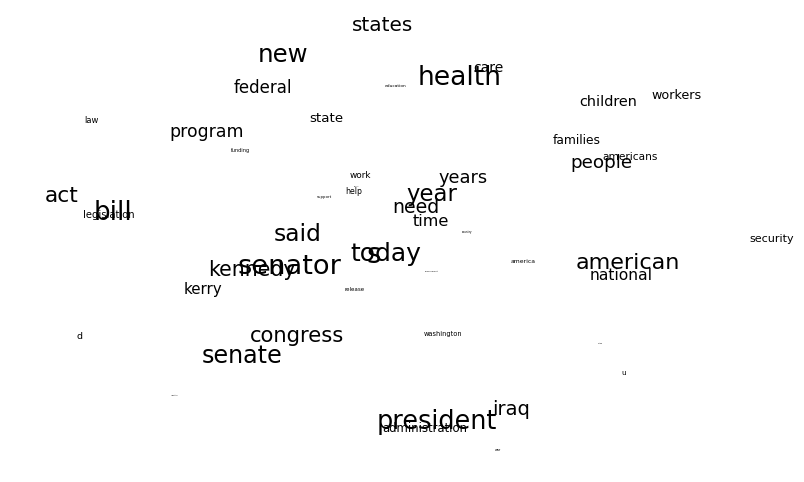

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

My visualization above puts ``said`` next to ``congress`` and ``bill`` near ``act``. ``health`` is beside ``care`` and ``national`` abuts ``security``.

## Adding more context - FastText

Since the original word2vec paper, there have followed a slew of word embedding related methods which innovate and build on them in many ways. One popular extension is FastText ([Bojanowski et al. 2017](https://arxiv.org/abs/1607.04606)), which uses sub-words to generate its vectors. Using subwords means that it is powerful in dealing with unknown words and sparse languages that otherwise have a rich morphological structure. These sub-words are incorporated into the previously skipgram and CBOW methods. For example, if the word is “which”, it is represented as the word itself along with a bag of constituent n-grams. If n=3, the representation looks like <wh, whi, hic, ich, ch>, and we learn a representation for each of these constituents, with the word “which” taking on the average value of these constituents.

FastText can be used either via Gensim or the official package, and primarily has two functions - word representations, and text classification (Joulin et al. 2017). See below for code using the FastText package for playing with word representations, taken from their word representations tutorial (https://fasttext.cc/docs/en/unsupervised-tutorial.html).


In [ ]:
! pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199776 sha256=ee5f0b798bc7ca8430d5dffea88c228fe6cafe8905212b9ee68a504c11fcbe12
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


### Representations with FastText

We will follow the instructions in the FastText tutorial to prepare our data, (Wikipedia). You can either follow the instructions on the page for setting the data, or download/copy it to drive it from this [Google Drive link](https://drive.google.com/file/d/12T3nNzf0a7tdhm1lVyfz9Ix9XVITFMCP/view?usp=sharing).

In this example, we will be training a model - it is also possible to download and use the many pre-trained models.

In [ ]:
import fasttext

In [ ]:
# Replace with the path for where you have placed the 'fil9' file.
file_address = "fil9"

In [ ]:
model = fasttext.train_unsupervised(file_address, minCount=200, epoch=1)

While FastText is running, the progress and estimated time to completion is shown on your screen. Once the training finishes, the model variable contains information on the trained model, which you can use for querying:



In [ ]:
model.words

It returns all words in the vocabulary, sorted by decreasing frequency. We can get the word vector by:



In [ ]:
model.get_word_vector("the")

array([ 1.01263069e-01, -5.90192489e-02,  1.61868244e-01, -1.01701789e-01,
        2.11401746e-01,  3.44076864e-02,  1.06779106e-01, -7.01764673e-02,
       -2.77115434e-01, -3.33278567e-01, -2.25600272e-01,  2.84197815e-02,
        4.64334451e-02, -3.16535458e-02,  1.81303080e-02,  4.28940691e-02,
        1.87967479e-01, -2.95054838e-02,  7.59627223e-02,  2.25423761e-02,
        1.01923592e-01, -3.57791893e-02,  1.26660556e-01, -6.02674000e-02,
        7.77557120e-02,  2.25575492e-01,  3.91170114e-01,  2.25593746e-01,
       -2.84654528e-01, -9.91142765e-02,  6.44938052e-02,  2.01031938e-01,
       -6.81440681e-02, -1.06424704e-01,  4.65644971e-02,  1.19772151e-01,
       -6.29343688e-02,  3.63371581e-01,  4.77561578e-02,  6.11040592e-02,
       -8.36888999e-02, -4.58102636e-02, -1.21765435e-01,  9.46124494e-02,
        2.85717428e-01, -1.05698608e-01,  4.03688736e-02,  1.54146299e-01,
       -1.79450721e-01, -9.32932720e-02,  7.56328460e-03, -1.15344204e-01,
        1.28116474e-01,  

In [ ]:
model.save_model("fil9.bin")

In [ ]:
# when we want to use the model again
model = fasttext.load_model("fil9.bin")

Let's now print some vectors.

In [ ]:
[model.get_word_vector(x) for x in ["asparagus", "pidgey", "yellow"]]

[array([-0.14006662, -0.07485355,  0.319586  , -0.04093548,  0.09198429,
         0.1261278 , -0.03269082, -0.11055066,  0.04655714, -0.1326036 ,
        -0.04546691, -0.25087675,  0.18515807,  0.14625898, -0.06811476,
         0.05070682,  0.17836626,  0.04091097, -0.08842913,  0.151132  ,
         0.06338568, -0.17596854, -0.07060655,  0.1902626 , -0.0789043 ,
         0.03498681,  0.43267778,  0.12663811, -0.14121874, -0.0656484 ,
         0.05628384,  0.25708377,  0.20422208, -0.03867839,  0.10115422,
        -0.02700523, -0.11787999,  0.32505086, -0.05171636,  0.136551  ,
        -0.17223425,  0.25701734, -0.22905089, -0.04056008,  0.0833502 ,
         0.15513909,  0.37595323, -0.04926715, -0.15345646,  0.21379124,
        -0.18380232,  0.01716743, -0.1489495 , -0.15657601,  0.26150805,
        -0.14652215,  0.04858861,  0.3603034 , -0.06512161,  0.16244695,
         0.00835189, -0.01089688,  0.4704638 , -0.09488831, -0.06462533,
         0.3277814 ,  0.16953354, -0.04525212, -0.0

A nice feature is that you can also query for words that did not appear in your data! Indeed words are represented by the sum of their substrings. As long as the unknown word is made of known substrings, there is a representation of it!

As an example let's try with a misspelled word:



In [ ]:
model.get_word_vector("enviroment")

array([-2.70548295e-02,  1.50540456e-01,  2.53648639e-01, -4.23338339e-02,
        1.38390139e-01,  1.23571225e-01, -3.33544403e-01, -3.00642520e-01,
       -5.74875437e-02,  4.31564808e-01, -2.16350675e-01, -1.72045216e-01,
        6.48741424e-02,  4.55947854e-02,  1.11958481e-01, -1.84667960e-01,
        3.20180207e-01, -2.58245885e-01, -5.46172746e-02, -1.11285992e-01,
        2.84395278e-01, -2.85696507e-01, -7.29190707e-02,  1.13132909e-01,
        1.05610386e-01,  2.34497786e-01,  4.10215378e-01,  2.38320827e-01,
       -1.79288089e-01, -5.25667548e-01,  1.53210200e-02,  1.14100046e-01,
        1.30865082e-01, -4.06445339e-02,  6.67985082e-02, -4.82941747e-01,
       -1.17705710e-01,  1.97724909e-01,  2.43855476e-01,  2.99321171e-02,
       -2.99975365e-01,  2.00883836e-01, -1.07507303e-01,  3.99979770e-01,
        2.07314998e-01,  5.43931544e-01, -9.83017087e-02,  2.69692481e-01,
       -2.01667085e-01, -1.80381555e-02,  1.18486591e-01,  1.65626518e-02,
        1.53593928e-01, -

In [ ]:
# Add FastText here

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec` and/or `fasttext`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why?

<font color="red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

In [32]:
import requests
from bs4 import BeautifulSoup

def get_reviews(appid, params={'json': 1}):
    url = 'https://store.steampowered.com/appreviews/'
    response = requests.get(url=url + str(appid), params=params, headers={'User-Agent': 'Mozilla/5.0'})
    return response.json()

def get_n_reviews(appid, n=100):
    reviews = []
    cursor = '*'
    params = {
        'json': 1,
        'filter': 'all',
        'language': 'english',
        'day_range': 9223372036854775807,
        'review_type': 'all',
        'purchase_type': 'all'
    }

    for _ in range(5):
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)
        n -= 100

        response = get_reviews(appid, params)
        cursor = response['cursor']
        reviews += [review['review'] for review in response['reviews']]

        if len(response['reviews']) < 100:
            break

    return reviews

In [33]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def get_reviews(appid, params={'json': 1}):
    url = 'https://store.steampowered.com/appreviews/'
    response = requests.get(url=url + str(appid), params=params, headers={'User-Agent': 'Mozilla/5.0'})
    return response.json()

def get_n_reviews(appid, n=100):
    reviews = []
    cursor = '*'
    params = {
        'json': 1,
        'filter': 'all',
        'language': 'english',
        'day_range': 9223372036854775807,
        'review_type': 'all',
        'purchase_type': 'all'
    }

    while n > 0:
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)

        response = get_reviews(appid, params)
        cursor = response['cursor']
        reviews += response['reviews']

        n -= len(response['reviews'])

        if len(response['reviews']) < 100:
            break

    return reviews[:500]  # Limit to the first 500 reviews

# Replace this with the actual list of links
steam_links = [
    'https://store.steampowered.com/app/1086940/Baldurs_Gate_3/',
    'https://store.steampowered.com/app/730/CounterStrike_2/',
    'https://store.steampowered.com/app/1966720/Lethal_Company/',
    'https://store.steampowered.com/app/1938090/Call_of_Duty/',
    'https://store.steampowered.com/app/1599340/Lost_Ark/',
    'https://store.steampowered.com/app/230410/Warframe/',
    'https://store.steampowered.com/app/1085660/Destiny_2/',
    'https://store.steampowered.com/app/2140330/Madden_NFL_24/',
    'https://store.steampowered.com/app/582010/Monster_Hunter_World/',
]

# Extract app ids and game names using regular expressions
app_id_to_game_name_mapping = {}
for link in steam_links:
    match = re.search(r'/app/(\d+)/([^/]+)/', link)
    if match:
        app_id = int(match.group(1))
        game_name = match.group(2).replace('_', ' ')
        app_id_to_game_name_mapping[app_id] = game_name

# Function to get reviews
def get_game_reviews_df(app_id_to_game_name_mapping):
    reviews_data = []

    for appid, game_name in app_id_to_game_name_mapping.items():
        reviews = get_n_reviews(appid, n=300)  # Limit to the first 300 reviews

        # Extract individual reviews and dates
        individual_reviews = [review['review'] for review in reviews]
        review_dates = [review['timestamp_created'] for review in reviews]

        # Clean reviews
        cleaned_reviews = [re.sub(r'[\n\r\t]', ' ', review) for review in individual_reviews]

        # Convert dates to ranks within each game
        date_ranks = pd.Series(review_dates).rank(method='dense').astype(int)

        # Create a DataFrame with exploded reviews and dates
        exploded_df = pd.DataFrame({
            'GameName': [game_name] * len(cleaned_reviews),
            'Reviews': cleaned_reviews,
            'Date': date_ranks  # Add the date ranks as a column
        })

        reviews_data.append(exploded_df)

    df = pd.concat(reviews_data, ignore_index=True)
    return df

# Create DataFrame
reviews_df = get_game_reviews_df(app_id_to_game_name_mapping)

# Display the DataFrame
print(reviews_df)

                  GameName                                            Reviews  \
0           Baldurs Gate 3  You know that time when you're playing D&D and...   
1           Baldurs Gate 3  You can convince bosses to kill themselves. 10/10   
2           Baldurs Gate 3  my work is really cutting into my Baldur's Gat...   
3           Baldurs Gate 3  Possessed a guard and had them open a gate con...   
4           Baldurs Gate 3  I have only one point of criticism: This game ...   
...                    ...                                                ...   
2695  Monster Hunter World  I am a 55 year old biker and trucker father, a...   
2696  Monster Hunter World  just started guys, how do i beat the bird with...   
2697  Monster Hunter World                                 I like the monkeys   
2698  Monster Hunter World  After clocking an ungodly amount of hours on t...   
2699  Monster Hunter World  Friends got me to buy the game, played for 2-3...   

      Date  
0      224  
1

In [34]:
import spacy
import nltk
from nltk.stem import PorterStemmer
import lucem_illud

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")  # Replace with your model name

# Download NLTK resources
nltk.download('punkt')

# Create a Porter stemmer instance
porter_stemmer = PorterStemmer()

# Assuming your DataFrame is named 'reviews_df' and has a 'Reviews' column
reviews_df['tokenized_text'] = reviews_df['Reviews'].apply(lambda x: lucem_illud.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [35]:
import nltk
import re

nltk.download('stopwords')

from nltk.corpus import stopwords

# Define the set of English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords, words with apostrophes, symbols, and numbers from a list of tokens
def remove_non_words(tokens):
    return [token for token in tokens if token.isalpha() and token.lower() not in stop_words and "'" not in token]

# Apply the remove_non_words function to your tokenized text column
reviews_df['filtered_tokens'] = reviews_df['tokenized_text'].apply(remove_non_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
import gensim

# Ensure each item in 'normalized_tokens' is a list of words
normalized_sentences = reviews_df['filtered_tokens'].tolist()

# Train Word2Vec model using your dataset
reviewsW2V = gensim.models.word2vec.Word2Vec(normalized_sentences, sg=0)

In [9]:
# Find the most similar words to 'game'
reviewsW2V.wv.most_similar('game')

[('playing', 0.9913977980613708),
 ('played', 0.9900168776512146),
 ('play', 0.9881811738014221),
 ('fun', 0.9874581694602966),
 ('would', 0.9847198128700256),
 ('say', 0.9838531017303467),
 ('recommend', 0.9837870001792908),
 ('since', 0.9834643602371216),
 ('ever', 0.9832746982574463),
 ('review', 0.9825034737586975)]

In [10]:
# Find the word that doesn't match the others in the list
reviewsW2V.wv.doesnt_match(['crash', 'specs', 'frames', 'adventure'])

'specs'

In [11]:
# Find the word that doesn't match the others in the list
reviewsW2V.wv.doesnt_match(['explore', 'escape', 'adventure', 'specs'])

'specs'

In [12]:
# Find words similar to bad and content and dissimilar to good
reviewsW2V.wv.most_similar(positive=['bad', 'content'], negative=['good'])

[('players', 0.9907859563827515),
 ('item', 0.9887889623641968),
 ('season', 0.9885295033454895),
 ('raids', 0.9880631566047668),
 ('characters', 0.9880052208900452),
 ('character', 0.9878566265106201),
 ('items', 0.9877398610115051),
 ('materials', 0.987709641456604),
 ('high', 0.9875319600105286),
 ('lower', 0.9874703288078308)]

**PCA analysis below of general reviews (not subsetted):**

In [13]:
import numpy as np
import sklearn.decomposition
import sklearn.manifold

# Filter out words with apostrophes
numWords = 50
targetWords = [word for word in reviewsW2V.wv.index_to_key[:numWords] if "'" not in word]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(reviewsW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)

pcaWords = sklearn.decomposition.PCA(n_components=50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)

# T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components=2).fit_transform(reducedPCA_data)

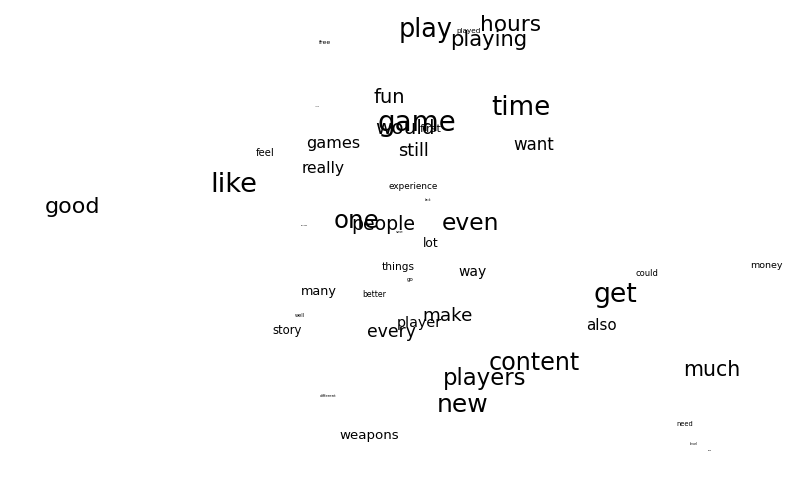

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha=0)  # Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i], tsneWords[:, 1][i]), size=20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

**Not super informative, but suggests that playing and time are interrelated. Money is largely irrelevant. "New" and "content" suggests some amount of interest in new content (as opposed to new something-else).**

**TNSE analysis below of general reviews (not subsetted):**

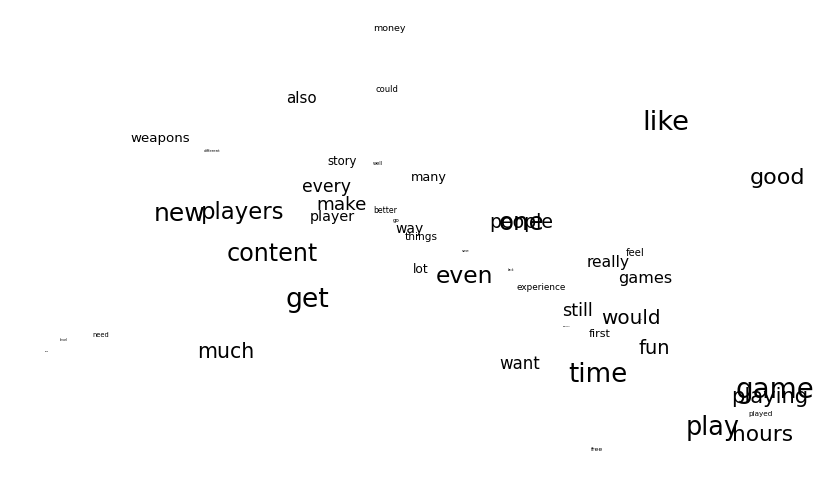

In [18]:
import numpy as np
import sklearn.manifold
import matplotlib.pyplot as plt

# Filter out words with apostrophes
numWords = 50
targetWords = [word for word in reviewsW2V.wv.index_to_key[:numWords] if "'" not in word]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(reviewsW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)

# T-SNE is used for dimensionality reduction
tsneWords = sklearn.manifold.TSNE(n_components=2).fit_transform(wordsSubMatrix)

# Plotting the word vectors using t-SNE
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha=0)  # Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i], tsneWords[:, 1][i]), size=20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

**There are some minor differences from the PCA (apart from overall dimensional differences), but no different conclusions would really be drawn from this graphic (at least, not interpretably; for instance, "like" and "feel" are further in this case, but it's not clear what to make of that).**

**The normal fasttext package is not applicable to my project, so used an alternate version here (which turned out to not be useful).**

In [15]:
###FAST TEXT PACKAGE ABOVE IS NOT RELEVANT TO MY PROJECT, so I used this instead

from gensim.models import FastText

# Assuming 'filtered_tokens' is your column containing preprocessed text data as lists of tokens
tokenized_data = reviews_df['filtered_tokens'].tolist()

# Train the FastText model
rev_ftext_model = FastText(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=1)

# Save the model
rev_ftext_model.save("rev_ftext")

In [16]:
# when we want to use the model again
model = FastText.load("rev_ftext")

In [17]:
# List of words for which you want to obtain word vectors
words_to_get_vectors = ["content", "adventure", "specs"]

# Obtain word vectors for the specified words
word_vectors = [model.wv.get_vector(x) for x in words_to_get_vectors]
word_vectors

[array([ 0.01157776,  0.30808777, -0.22386655, -0.08125561,  0.10166692,
         0.09952307, -0.08764417, -0.34264353,  0.34364158,  0.07320838,
         0.10092269,  0.22450748,  0.10063836,  0.35197133,  0.1593997 ,
        -0.24225748, -0.2104113 , -0.25129247, -0.11253975, -0.2074461 ,
        -0.3363622 ,  0.07969258, -0.13052848, -0.25580296, -0.24362873,
        -0.05709309,  0.02315559,  0.03164255, -0.37789917,  0.09654116,
         0.08973844,  0.04583465, -0.09979211, -0.02577719,  0.08052798,
         0.28412852,  0.30700463,  0.48665562,  0.02284507, -0.20680995,
        -0.02740416, -0.07876907,  0.23165067, -0.5456597 , -0.18361948,
        -0.2832899 , -0.068145  , -0.06886594,  0.18995713,  0.3668838 ,
         0.17114148, -0.02483352,  0.271651  ,  0.09186504,  0.27371624,
         0.02601109, -0.39523262, -0.49152568, -0.18805154, -0.36856765,
         0.36283535, -0.38078603, -0.4202213 , -0.1977174 , -0.10887124,
        -0.08802764, -0.14622957,  0.3644578 ,  0.5

**Not as useful as Word2Vec, so won't pursue this further. Instead, returning to Word2Vec for closer analysis, different specifications.**

In [21]:
#Let's focus on two games of two very different genres: Baldurs Gate 3 and Madden NFL 24
reviews_df["GameName"].unique()

array(['Baldurs Gate 3', 'CounterStrike 2', 'Lethal Company',
       'Call of Duty', 'Lost Ark', 'Warframe', 'Destiny 2',
       'Madden NFL 24', 'Monster Hunter World'], dtype=object)

### Baldurs Gate 3

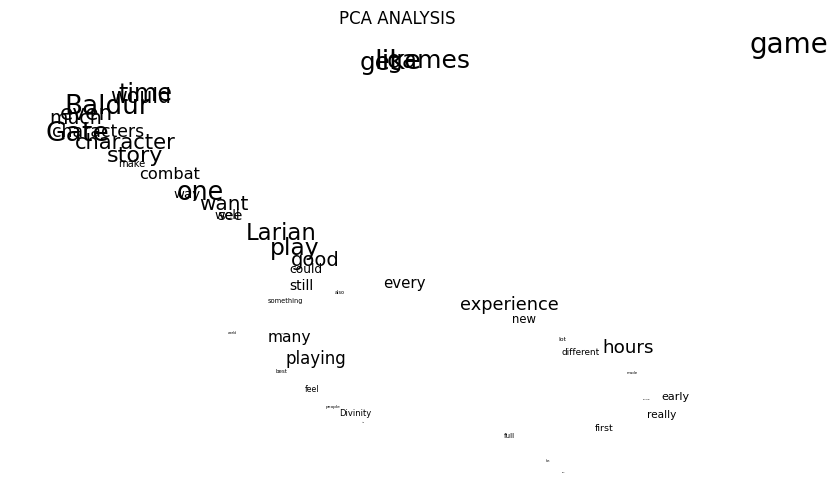

In [77]:
# Subset reviews_df where GameName is "Baldurs Gate 3"
subset_reviews_df = reviews_df[reviews_df["GameName"] == "Baldurs Gate 3"]

# Get the filtered tokens and convert them to a list of lists
normalized_sentences = subset_reviews_df['filtered_tokens'].tolist()

# Train Word2Vec model using your dataset
reviewsW2V = gensim.models.word2vec.Word2Vec(normalized_sentences, sg=0)

# Filter out words with apostrophes
numWords = 50
targetWords = [word for word in reviewsW2V.wv.index_to_key[:numWords] if "'" not in word]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(reviewsW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)

pcaWords = sklearn.decomposition.PCA(n_components=50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)

# T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components=2).fit_transform(reducedPCA_data)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha=0)  # Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i], tsneWords[:, 1][i]), size=20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.title("PCA ANALYSIS")
plt.show()

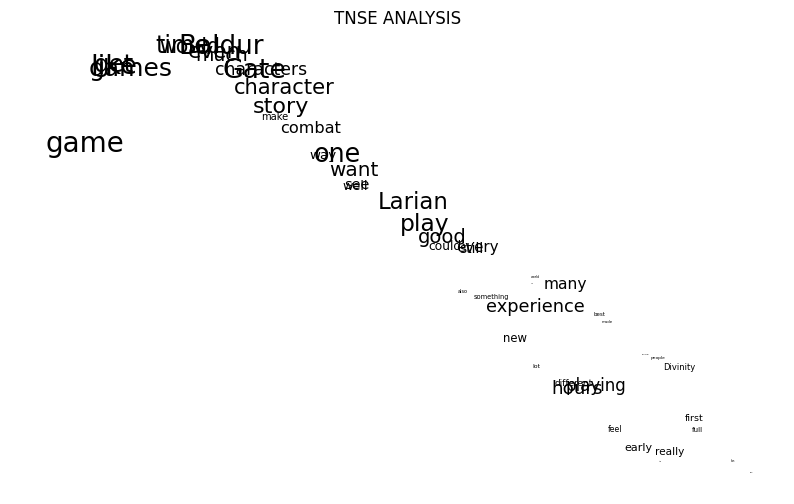

In [78]:
import numpy as np
import sklearn.manifold
import matplotlib.pyplot as plt

# Filter out words with apostrophes
numWords = 50
targetWords = [word for word in reviewsW2V.wv.index_to_key[:numWords] if "'" not in word]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(reviewsW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)

# T-SNE is used for dimensionality reduction
tsneWords = sklearn.manifold.TSNE(n_components=2).fit_transform(wordsSubMatrix)

# Plotting the word vectors using t-SNE
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha=0)  # Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i], tsneWords[:, 1][i]), size=20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.title("TNSE ANALYSIS")
plt.show()

In [79]:
# Find words similar to bad and content and dissimilar to good
reviewsW2V.wv.most_similar(positive=['like', 'game'], negative=['hate'])

[('finish', 0.9848639369010925),
 ('let', 0.984686553478241),
 ('kill', 0.9845840334892273),
 ('early', 0.9842858910560608),
 ('leave', 0.9840922951698303),
 ('far', 0.9840295910835266),
 ('days', 0.9840225577354431),
 ('played', 0.9839606285095215),
 ('well', 0.9838542342185974),
 ('time', 0.9837943315505981)]

Not super informative...probably just saying hate to do fun things in the game (like finishing it).

In [80]:
# Find the most similar words to 'fun'
reviewsW2V.wv.most_similar('fun')

[('even', 0.9996305704116821),
 ('game', 0.9996199607849121),
 ('way', 0.9995952844619751),
 ('combat', 0.9995828866958618),
 ('get', 0.9995798468589783),
 ('like', 0.9995751976966858),
 ('different', 0.999569296836853),
 ('go', 0.9995685815811157),
 ('Divinity', 0.9995648860931396),
 ('could', 0.9995629191398621)]

Okay nice, so the fun components have to do with content.

In [81]:
# cosine similarity between hard and fun
reviewsW2V.wv.n_similarity(["hard"], ["fun"])

0.9988525

Very high cosine similarity, so it seems players of this game like a challenge!

### Madden NFL 24

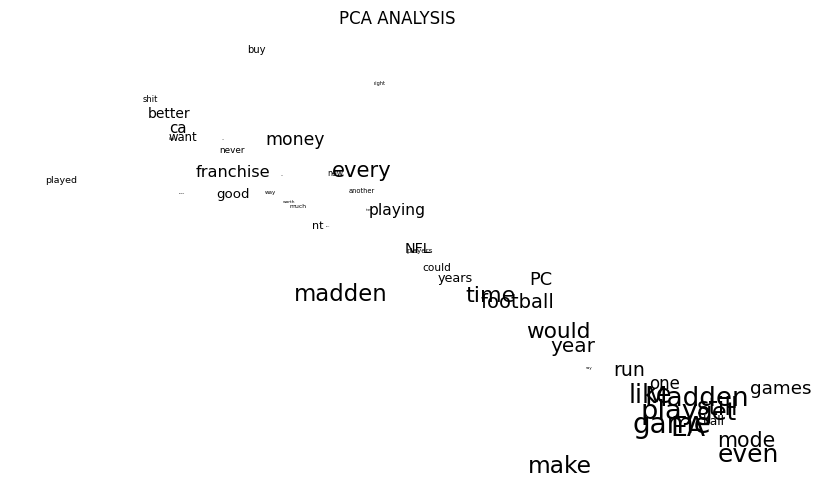

In [82]:
# Subset reviews_df where GameName is "Madden NFL 24"
subset_reviews_df = reviews_df[reviews_df["GameName"] == "Madden NFL 24"]

# Get the filtered tokens and convert them to a list of lists
normalized_sentences = subset_reviews_df['filtered_tokens'].tolist()

# Train Word2Vec model using your dataset
reviewsW2V = gensim.models.word2vec.Word2Vec(normalized_sentences, sg=0)

# Filter out words with apostrophes
numWords = 50
targetWords = [word for word in reviewsW2V.wv.index_to_key[:numWords] if "'" not in word]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(reviewsW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)

pcaWords = sklearn.decomposition.PCA(n_components=50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)

# T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components=2).fit_transform(reducedPCA_data)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha=0)  # Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i], tsneWords[:, 1][i]), size=20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.title("PCA ANALYSIS")
plt.show()

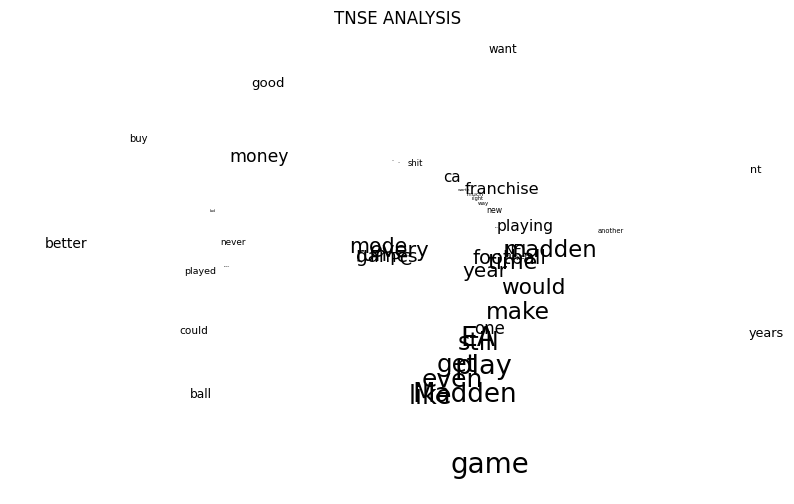

In [83]:
import numpy as np
import sklearn.manifold
import matplotlib.pyplot as plt

# Filter out words with apostrophes
numWords = 50
targetWords = [word for word in reviewsW2V.wv.index_to_key[:numWords] if "'" not in word]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(reviewsW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)

# T-SNE is used for dimensionality reduction
tsneWords = sklearn.manifold.TSNE(n_components=2).fit_transform(wordsSubMatrix)

# Plotting the word vectors using t-SNE
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha=0)  # Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i], tsneWords[:, 1][i]), size=20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.title("TNSE ANALYSIS")
plt.show()

In [84]:
# Find words similar to bad and content and dissimilar to good
reviewsW2V.wv.most_similar(positive=['like', 'game'], negative=['hate'])

[('input', 0.9801573753356934),
 ('broken', 0.979835569858551),
 ('yards', 0.9797381162643433),
 ('time', 0.9794985055923462),
 ('running', 0.9794444441795349),
 ('around', 0.979411244392395),
 ('lag', 0.9793360233306885),
 ('company', 0.9791067838668823),
 ('NFL', 0.9790031313896179),
 ('played', 0.978992223739624)]

In [85]:
# Find the most similar words to 'fun'
reviewsW2V.wv.most_similar('fun')

[('game', 0.9983013868331909),
 ('Madden', 0.9981563091278076),
 ('even', 0.998050332069397),
 ('get', 0.9980405569076538),
 ('play', 0.998025119304657),
 ('like', 0.9980236887931824),
 ('would', 0.9979895949363708),
 ('still', 0.9979206919670105),
 ('made', 0.9978882670402527),
 ('mode', 0.9978565573692322)]

Not very informative. Seems like most similar words are just qualifiers of fun for the most part, or have to do with the company.

In [73]:
# cosine similarity between hard and fun
reviewsW2V.wv.n_similarity(["hard"], ["fun"])

0.9924178

High cosine similarity so players like a challenge, but not as much as Baldurs Gate 3 players (and perhaps generalizing to the greater genres, not as much as RPG players).

**Overall, it seems like the genre of the game does have some effects on the kinds of relationships between review content elements. Closer examination is merited (to be done in the final project).**

###**The PCA analysis and the TNSE analysis are about equally informative. The subtraction analyses are probably the most helpful, because they reveal relationships between terms (which matters a lot for drawing inferences about the kinds of connections consumers are making in their reviews). The other analyses are also helpful though (such as cosine similarity measures directly, since they allow direct comparisons between corpora). Unfortunately, there aren't many takeaways from these. I suppose the most general one (which isn't surprising) is that people like more content. This inference is robustly supported. A lot of the review content (and likes/dislikes) seem idiosyncratic to the games.**

# Doc2Vec

Instead of just looking at just how words embed within in the space, we can look at how the different documents relate to each other within the space. First lets load our data--abstracts of most U.S. physics papers from the 1950s.

In [ ]:
apsDF = pd.read_csv('APSabstracts1950s.csv', index_col = 0)

apsDF[:10]

,copyrightYear,doi,abstract
0,1950,10.1103/RevModPhys.22.221,A summarizing account is given of the research...
1,1951,10.1103/RevModPhys.23.147,New tables of coulomb functions are presented ...
2,1951,10.1103/RevModPhys.23.185,Ionization by electron impact in diatomic gase...
3,1951,10.1103/RevModPhys.23.203,It is shown that the conductivity in the ohmic...
4,1951,10.1103/RevModPhys.23.21,The factorization method is an operational pro...
5,1951,10.1103/RevModPhys.23.311,A brief account is given of Dyson's proof of t...
6,1951,10.1103/RevModPhys.23.315,A systematics is given of all transitions for ...
7,1951,10.1103/RevModPhys.23.322,A systematics of the -transitions of even A nu...
8,1951,10.1103/RevModPhys.23.328,The available experiments on the absorption sp...
9,1952,10.1103/RevModPhys.24.108,The classical theory of the dynamics of viscou...


We will load these as documents into Word2Vec, but first we need to normalize and pick some tags.

In [ ]:
keywords = ['photomagnetoelectric', 'quantum', 'boltzmann', 'proton', 'positron', 'feynman', 'classical', 'relativity']

In [ ]:
apsDF['tokenized_words'] = apsDF['abstract'].apply(lambda x: lucem_illud.word_tokenize(x))
apsDF['normalized_words'] = apsDF['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in apsDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['copyrightYear'])
    docKeywords.append(row['doi']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = row['normalized_words'], tags = docKeywords))
apsDF['TaggedAbstracts'] = taggedDocs

Now we can train a Doc2Vec model:

In [ ]:
apsD2V = gensim.models.doc2vec.Doc2Vec(apsDF['TaggedAbstracts'], vector_size = 100) #Limiting to 100 dimensions

We can get vectors for the tags/documents, just as we did with words. Documents are actually the centroids (high dimensional average points) of their words.

In [ ]:
apsD2V.docvecs[1952]

array([ 0.47522372,  2.7017558 , -1.344297  ,  0.8588409 ,  0.30929446,
        0.9369865 , -0.42918837,  0.8503308 ,  0.8426844 , -0.82594496,
       -1.3439003 , -0.8417414 ,  0.20433284,  0.3343339 , -1.041668  ,
        0.51828086,  0.783438  ,  0.34935856,  0.57664096, -1.2641361 ,
        1.417075  ,  1.1732146 ,  0.41235414,  0.60235476, -1.8620524 ,
       -1.0522707 ,  0.4833592 , -0.11427418,  1.2301896 ,  1.4572117 ,
        1.2282588 , -0.70153624, -0.60012794,  1.6838121 , -1.1609182 ,
       -0.9389013 ,  0.9239716 , -0.5347603 , -0.43911725, -1.5722787 ,
        1.220825  , -1.6594146 , -1.870447  ,  0.40033305, -1.4195203 ,
        0.23733932, -1.9962168 , -1.0567358 , -1.8464332 ,  0.25339696,
       -1.2563062 ,  0.16872217,  0.47076824, -0.7204701 , -1.1723483 ,
       -1.6465772 ,  0.36797783,  0.41357887, -0.43356863, -1.2651285 ,
       -1.9435492 , -0.6790247 ,  1.5800354 ,  0.01781375, -1.8005286 ,
       -1.2985262 ,  0.9369389 , -0.28359613, -1.6966444 ,  1.30

The words can still be accessed in the same way:

In [ ]:
apsD2V['atom']

array([-1.6770238 , -1.0343108 ,  1.1005778 , -0.72600436,  1.1645813 ,
        0.65432066, -0.7597538 ,  0.82909083,  0.27153605,  0.5550711 ,
       -1.0262775 ,  0.01343375, -0.5982833 ,  0.28509015, -0.59329337,
        1.788566  , -0.3962542 ,  1.828652  ,  0.05623163, -1.984871  ,
       -1.8725805 ,  0.7720149 ,  0.10727599,  0.86136556, -0.18140982,
        0.38271636,  0.48278466,  0.31959787, -0.34194148,  1.3321534 ,
        0.894159  , -0.1075349 , -0.33896026,  1.1735675 , -1.048575  ,
       -0.769703  ,  0.29155728, -0.02292411,  0.29274654, -0.52379143,
        1.037279  ,  0.6525378 , -1.0652894 , -1.4574833 ,  1.2378116 ,
        0.22183715, -0.44950953,  0.6829188 , -0.6084431 ,  1.6787348 ,
        0.07108591,  0.40591708,  1.7055178 , -0.3898999 ,  0.58716714,
       -0.2967302 ,  0.24227485, -0.540202  ,  1.0444974 ,  0.3937816 ,
       -0.6964682 ,  0.30819264,  0.5535553 , -0.4598547 , -1.5659759 ,
       -0.49058533, -0.56716645, -0.80803823,  0.05902727, -0.32

We can still use the ``most_similar`` command to perform simple semantic equations:

In [ ]:
apsD2V.wv.most_similar(positive = ['atom','electrons'], negative = ['electron'], topn = 1)

[('atoms', 0.778275728225708)]

This is interesting. **Electron** is to **electrons** as **atom** is to **atoms**. Another way to understand this, developed below is: **electrons - electron** induces a singular to plural dimension, so when we subtract **electron** from **atom** and add **electrons**, we get **atoms**!

In [ ]:
apsD2V.wv.most_similar(positive = ['einstein','law'], negative = ['equation'], topn = 1)

[('obey', 0.7019518613815308)]

In other words **Einstein** minus **equation** plus **law** equals **Meissner**--Walthur Meissner studied mechanical engineering and physics ... and was more likely to produce a "law" than a "equation", like the Meissner effect, the damping of the magnetic field in superconductors. If we built our word-embedding with a bigger corpus like the entire arXiv, a massive repository of physics preprints, we would see many more such relationships like **gravity - Newton + Einstein = relativity**.

We can also compute all of these *by hand*--explicitly wth vector algebra:

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(apsD2V['electron'].reshape(1,-1), apsD2V['positron'].reshape(1,-1))
#We reorient the vectors with .reshape(1, -1) so that they can be computed without a warning in sklearn

array([[0.4105687]], dtype=float32)

In the doc2vec model, the documents have vectors just as the words do, so that we can compare documents with each other and also with words (similar to how a search engine locates a webpage with a query). First, we will calculate the distance between a word and documents in the dataset:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron'] ], topn=5 )

[('10.1103/PhysRev.113.1545', 0.445621132850647),
 ('10.1103/PhysRev.98.1020', 0.41921064257621765),
 ('10.1103/PhysRev.106.874', 0.41900435090065),
 ('10.1103/PhysRev.89.930', 0.4113309383392334),
 ('10.1103/PhysRev.115.678', 0.41070356965065)]

If we search for the first of these on the web (these are doi codes), we find the following...a pretty good match:

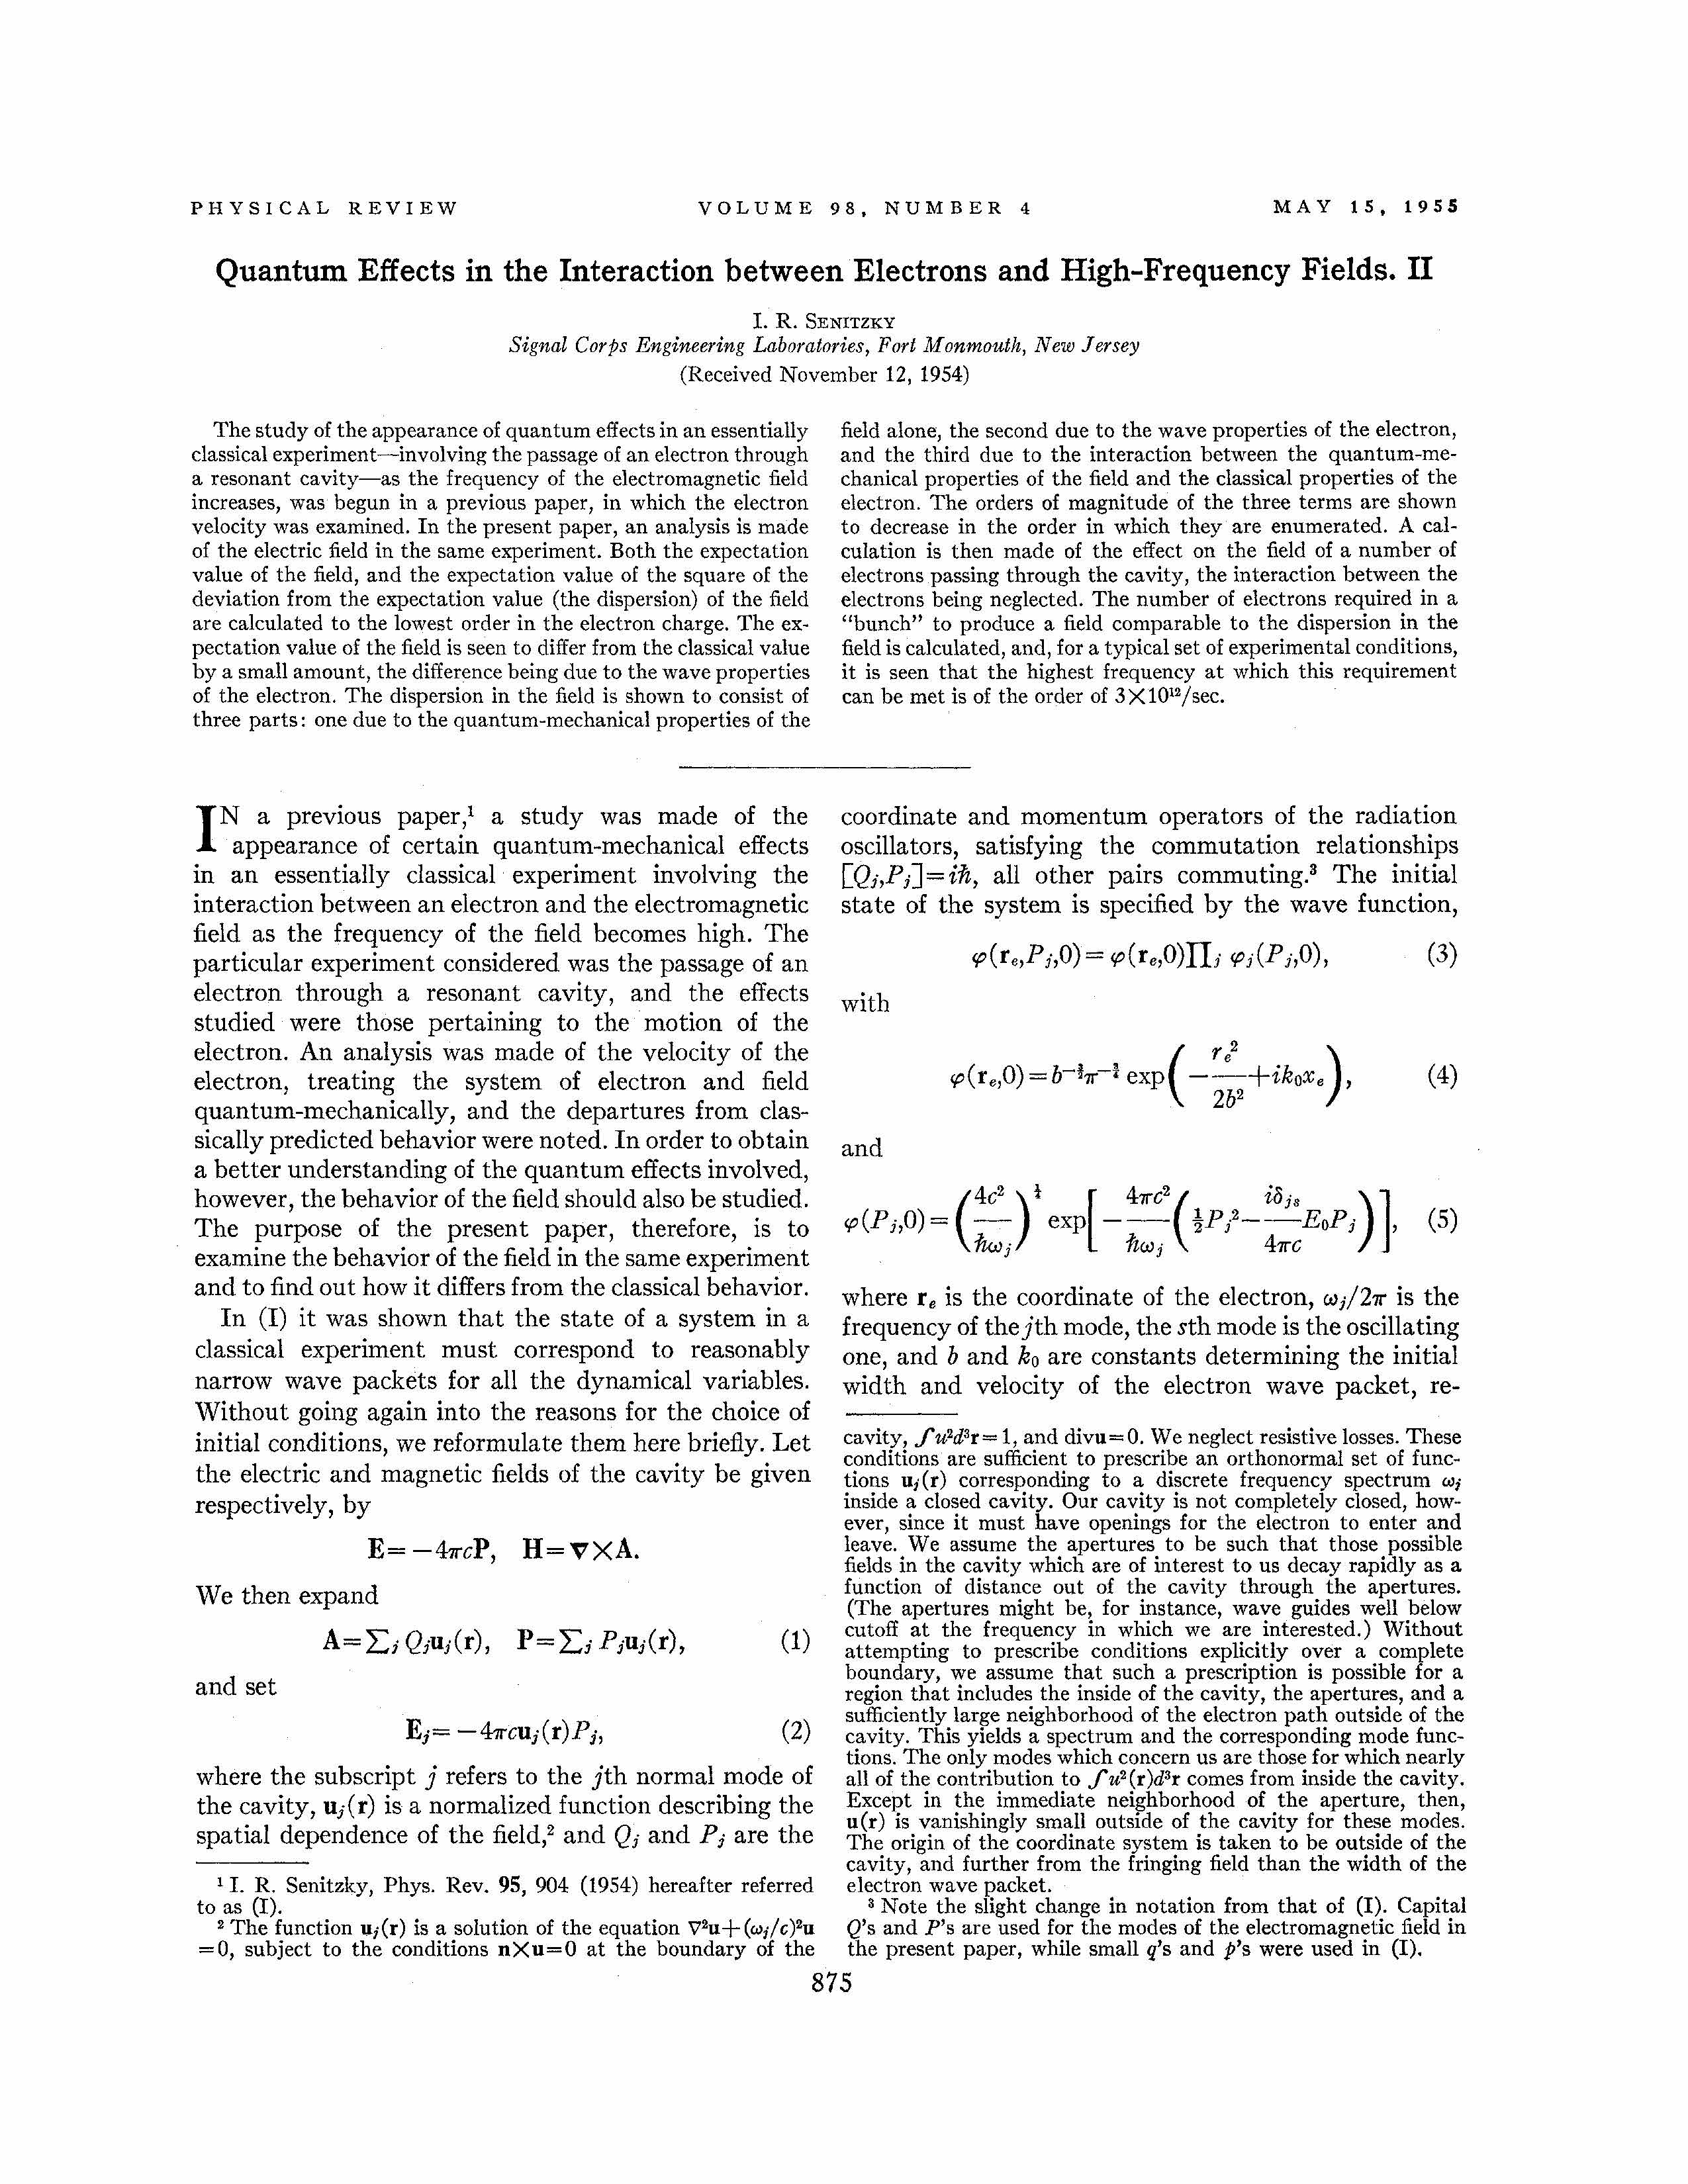

In [ ]:
from IPython.display import Image
Image("PhysRev.98.875.jpg", width=1000, height=1000)

Now let's go the other way around and find words most similar to this document:

In [ ]:
apsD2V.wv.most_similar( [ apsD2V.docvecs['10.1103/PhysRev.98.875'] ], topn=5)

[('volts', 0.6175204515457153),
 ('modulated', 0.5740225315093994),
 ('gauss', 0.5660907030105591),
 ('microscope', 0.5628368258476257),
 ('compensated', 0.5618155002593994)]

We can even look for documents most like a query composed of multiple words:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron']+apsD2V['positron']+apsD2V['neutron']], topn=5 )

[('10.1103/PhysRev.86.493', 0.5010477900505066),
 ('10.1103/PhysRev.99.786', 0.49710613489151),
 ('10.1103/PhysRev.103.340', 0.4926145374774933),
 ('10.1103/PhysRev.108.809', 0.4864920377731323),
 ('10.1103/PhysRev.91.883', 0.4846695065498352)]

Now let's plot some words and documents against one another with a heatmap:

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

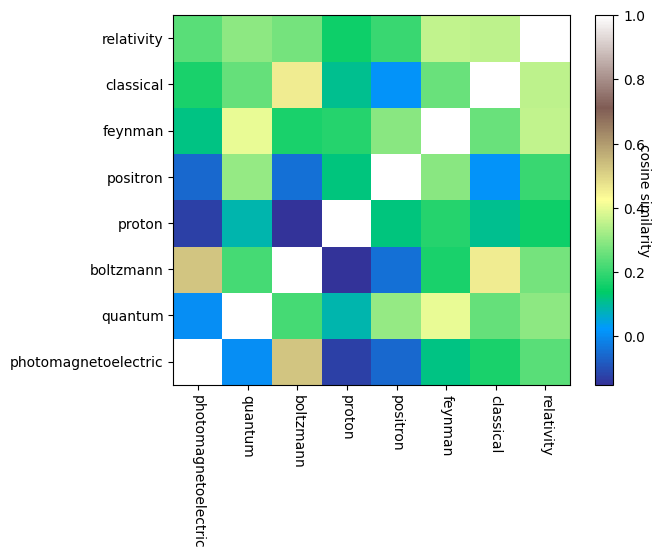

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

Now let's look at a heatmap of similarities between the first ten documents in the corpus:

In [ ]:
targetDocs = apsDF['doi'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

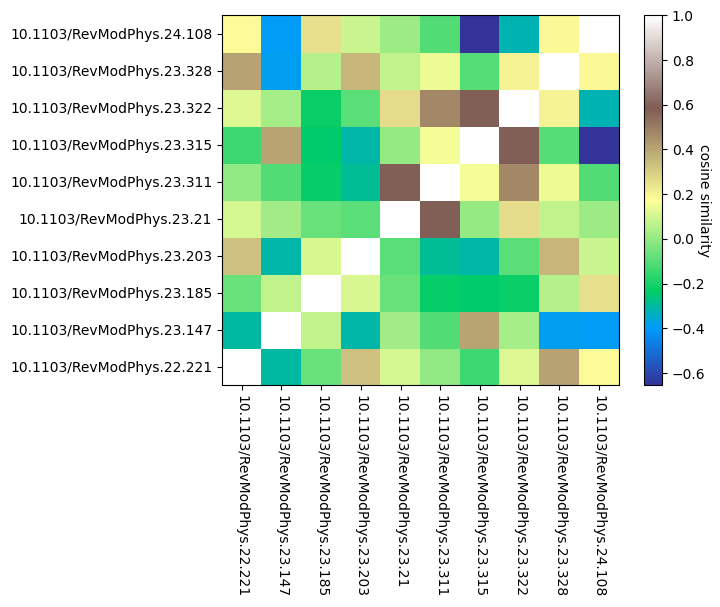

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

Now let's look at a heatmap of similarities between the first ten documents and our keywords:

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

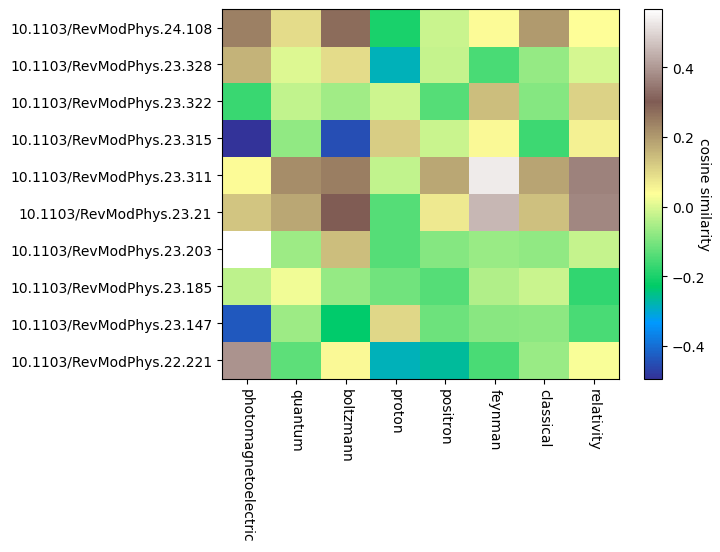

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

We will save the model in case we would like to use it again.

In [ ]:
apsD2V.save('apsW2V')

We can later load it:

In [ ]:
#apsD2V = gensim.models.word2vec.Word2Vec.load('data/apsW2V')

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

In [107]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Assuming you have a DataFrame called 'reviews_df' with columns 'GameName' and 'filtered_tokens'
# Convert lists of tokens to strings
reviews_df['filtered_tokens_str'] = reviews_df['filtered_tokens'].apply(lambda x: ' '.join(x))

# Create a list of game names in the original order
game_names = reviews_df['GameName'].tolist()

# Create TaggedDocument objects for each game's reviews
tagged_data = [TaggedDocument(words=review.split(), tags=[game_name]) for game_name, review in zip(game_names, reviews_df['filtered_tokens_str'])]

# Train the Doc2Vec model
d2v_model = Doc2Vec(tagged_data, vector_size=100)

In [112]:
#most content-focused games
d2v_model.docvecs.most_similar([d2v_model['content']], topn=5)

[('Destiny 2', 0.7863302826881409),
 ('Lost Ark', 0.6521097421646118),
 ('Baldurs Gate 3', 0.4221898317337036),
 ('Call of Duty', 0.37691354751586914),
 ('Monster Hunter World', 0.34876707196235657)]

**These make sense, except with the exception of Call of Duty (which tends to be less content based).**

In [115]:
#game most like Call of Duty
d2v_model.docvecs.most_similar([d2v_model.docvecs['Call of Duty']], topn=3)

[('Call of Duty', 1.0),
 ('Madden NFL 24', 0.6053430438041687),
 ('CounterStrike 2', 0.5468990206718445)]

**Very interesting -- not sure why Call of Duty is more similar to Madden NFL than Counterstrike (which is also an FPS). Likely worth investigating, because the priorities might transcend genres (e.g., large development teams).**

In [155]:
from gensim.models import Doc2Vec

# Assuming you have already trained your Doc2Vec model and it's stored in 'd2v_model'

# Define the words and document vectors
baldurs_gate_3_vector = d2v_model.docvecs["Baldurs Gate 3"]
call_of_duty_vector = d2v_model.docvecs["Call of Duty"]
word_vectors = {word: d2v_model.wv[word] for word in ['hate', 'like']}

# Compute the analogy by adding and subtracting vectors
analogy_vector = call_of_duty_vector + (word_vectors['like'] - baldurs_gate_3_vector)

# Find the word most similar to the resulting vector
most_similar_word, similarity = None, -1
for word, vector in word_vectors.items():
    sim = d2v_model.wv.cosine_similarities(analogy_vector, [vector])[0]
    if sim > similarity:
        most_similar_word, similarity = word, sim

# Output the most similar word
print(f"In terms of the association of 'like' with 'Baldur's Gate 3', people experience 'hate' most similarly in 'Call of Duty': {most_similar_word} (Similarity: {similarity})")

In terms of the association of 'like' with 'Baldur's Gate 3', people experience 'hate' most similarly in 'Call of Duty': hate (Similarity: 0.20776188373565674)


**It seems people like to like Baldur's Gate 3 as much as they like to hate Call of Duty. Go figure.**

**Below, a heatmap of games' similarities.**

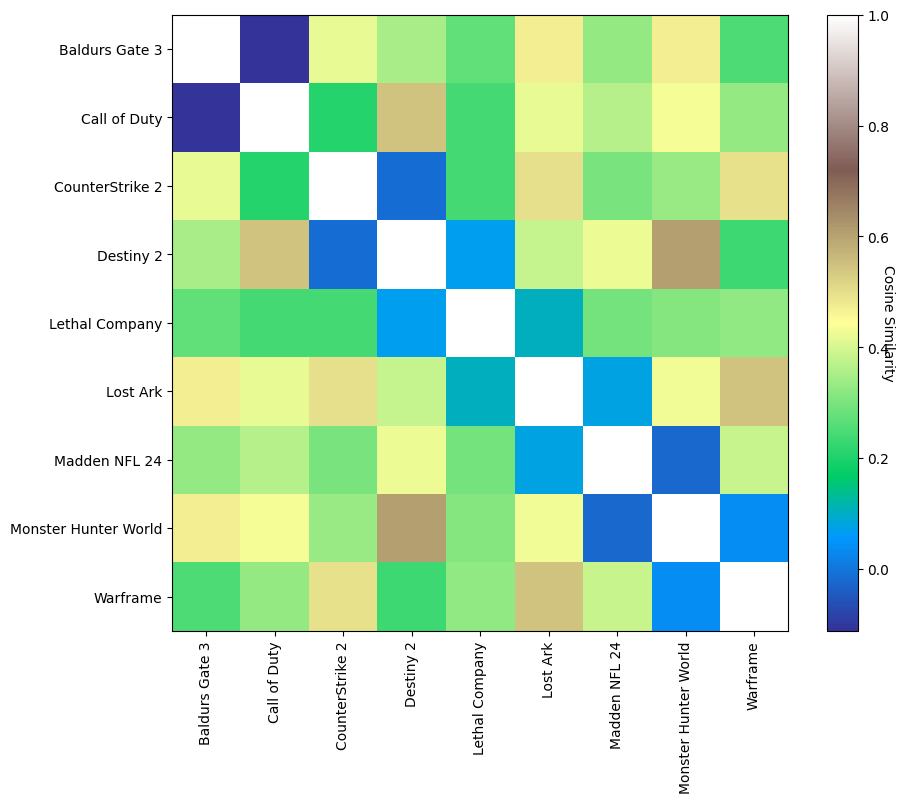

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise

# Initialize an empty heatmap matrix
num_games = len(game_reviews)
heatmapMatrix = np.zeros((num_games, num_games))

# Compute cosine similarity between document vectors for each pair of games
for i in range(num_games):
    for j in range(num_games):
        similarity = sklearn.metrics.pairwise.cosine_similarity(
            d2v_model.dv[i].reshape(1, -1),
            d2v_model.dv[j].reshape(1, -1)
        )[0][0]
        heatmapMatrix[i][j] = similarity

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
hmap = ax.imshow(heatmapMatrix, cmap='terrain', interpolation='nearest')

# Add color bar
cbar = plt.colorbar(hmap)
cbar.set_label('Cosine Similarity', rotation=270)

# Set labels
ax.set_xticks(np.arange(num_games))
ax.set_yticks(np.arange(num_games))
ax.set_xticklabels(game_reviews['GameName'], rotation=90)
ax.set_yticklabels(game_reviews['GameName'])

plt.show()

**This is *very* informative. A lot of this supports the disinction based on genre (for instance, Destiny 2 and Monster Hunter World are both combat based, grinding, loot collecting games, so the higher cosine similarity makes sense). However, in line with the prior analysis, for some reason Call of Duty and Counterstrike 2 have lower-than-expected cosine similarity.**

**Below, a heatmap of game similarity with keywords trying to capture genre: ['survival', 'stealth', 'adventure', 'open-world', 'action', 'strategy', 'exploration', 'RPG']**

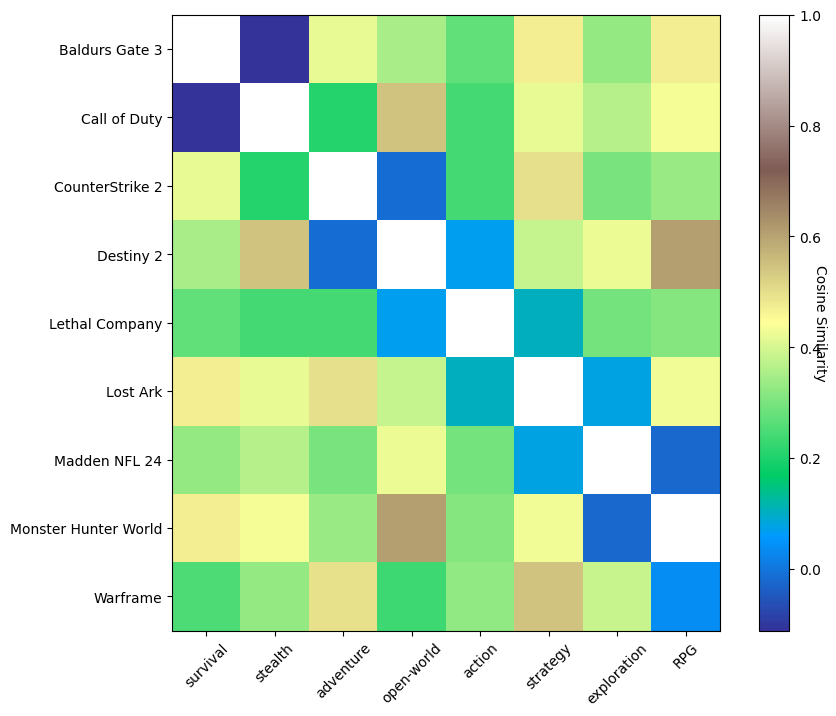

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise

# Define your list of keywords
keywords = ['survival', 'stealth', 'adventure', 'open-world', 'action', 'strategy', 'exploration', 'RPG']

# Initialize an empty heatmap matrix
num_games = len(game_reviews)
heatmapMatrixC = np.zeros((num_games, len(keywords)))

# Compute cosine similarity between each game's document vector and the vectors of keywords
for i, game_name in enumerate(game_reviews['GameName']):
    game_vec = d2v_model.dv[i].reshape(1, -1)
    column = []
    for keyword in keywords:
        keyword_vec = d2v_model.dv[keywords.index(keyword)].reshape(1, -1)
        similarity = sklearn.metrics.pairwise.cosine_similarity(game_vec, keyword_vec)[0][0]
        column.append(similarity)
    heatmapMatrixC[i] = column

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
hmap = ax.imshow(heatmapMatrixC, cmap='terrain', interpolation='nearest')

# Add color bar
cbar = plt.colorbar(hmap)
cbar.set_label('Cosine Similarity', rotation=270)

# Set labels
ax.set_xticks(np.arange(len(keywords)))
ax.set_yticks(np.arange(num_games))
ax.set_xticklabels(keywords, rotation=45)
ax.set_yticklabels(game_reviews['GameName'])

plt.show()


**Ideally, we'd be able to identity game genres using the reviews. To some extent, it seems like we can (that's to say, for most games, the most frequent category/categories are in line with how the games are advertised). However, some of the cosine similarities are further off (though post-hoc, I have ideas about why they are what they are). For instance, Call of Duty having the largest cosine similarity to open-world barely makes sense given the kind of content it contains. Maybe some of the review content that is most obvious is excluded (e.g., action for an action-packed game)?**

In [136]:
from gensim.models import Doc2Vec

# Assuming you have already trained your Doc2Vec model and it's stored in 'd2v_model'

# Retrieve the vectors for "Call of Duty"
call_of_duty_vector = d2v_model.docvecs['Call of Duty']

# Compute the sum of the vectors
sum_vector = lost_ark_vector + call_of_duty_vector

# Find the most similar document to the sum vector that is not "Lost Ark" or "Call of Duty"
most_similar_docs = d2v_model.docvecs.most_similar([sum_vector], topn=5)
filtered_most_similar_docs = [(doc, similarity) for doc, similarity in most_similar_docs if doc not in ['Lost Ark', 'Call of Duty']]

# Output the most similar document that is not "Lost Ark" or "Call of Duty"
if filtered_most_similar_docs:
    most_similar_doc, similarity = filtered_most_similar_docs[0]
    print("Most similar document to the sum of 'Lost Ark' and 'Call of Duty' (excluding 'Lost Ark' and 'Call of Duty'):")
    print(f"Document ID: {most_similar_doc}, Similarity: {similarity}")
else:
    print("No similar document found excluding 'Lost Ark' and 'Call of Duty'.")

Most similar document to the sum of 'Lost Ark' and 'Call of Duty' (excluding 'Lost Ark' and 'Call of Duty'):
Document ID: Madden NFL 24, Similarity: 0.6038758158683777


**The above code tried to find the document that contains the most shared elements between the two games (Lost Ark and Call of Duty), but the output makes me think it was done suboptimally. I'll have to talk it over with my groupmate to see if he has better ideas for capturing this. Or, perhaps, there's something I'm missing that the doc2vec is picking up on.**

###**There is apparent evidence of diversity in the corpora, though the source of this diversity is only partially understood by me based on these analyses. I'm not 100% sure what else is to be done though. I'll have to think on it. As of now, it seems certain games do, indeed, cause fixation on different elements in the reviews. I'll need a broader range of games in each genre to better understand the effect of genre (as well as other factors, like popularity, since all these games are popular).**

# Projection

We can also project word vectors to an arbitray semantic dimension. To demonstrate this possibility, let's first load a model trained with New York Times news articles.

In [ ]:
nytimes_model = gensim.models.KeyedVectors.load_word2vec_format('nytimes_cbow.reduced.txt')

First we can visualize with dimension reduction

In [ ]:
#words to create dimensions
tnytTargetWords = ['man','him','he', 'woman', 'her', 'she', 'black','blacks','African', 'white', 'whites', 'Caucasian', 'rich', 'richer', 'richest', 'expensive', 'wealthy', 'poor', 'poorer', 'poorest', 'cheap', 'inexpensive']
#words we will be mapping
tnytTargetWords += ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse", "steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry", "basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(nytimes_model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [ ]:
pcaWordsNYT = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_dataNYT = pcaWordsNYT.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNYT = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNYT)

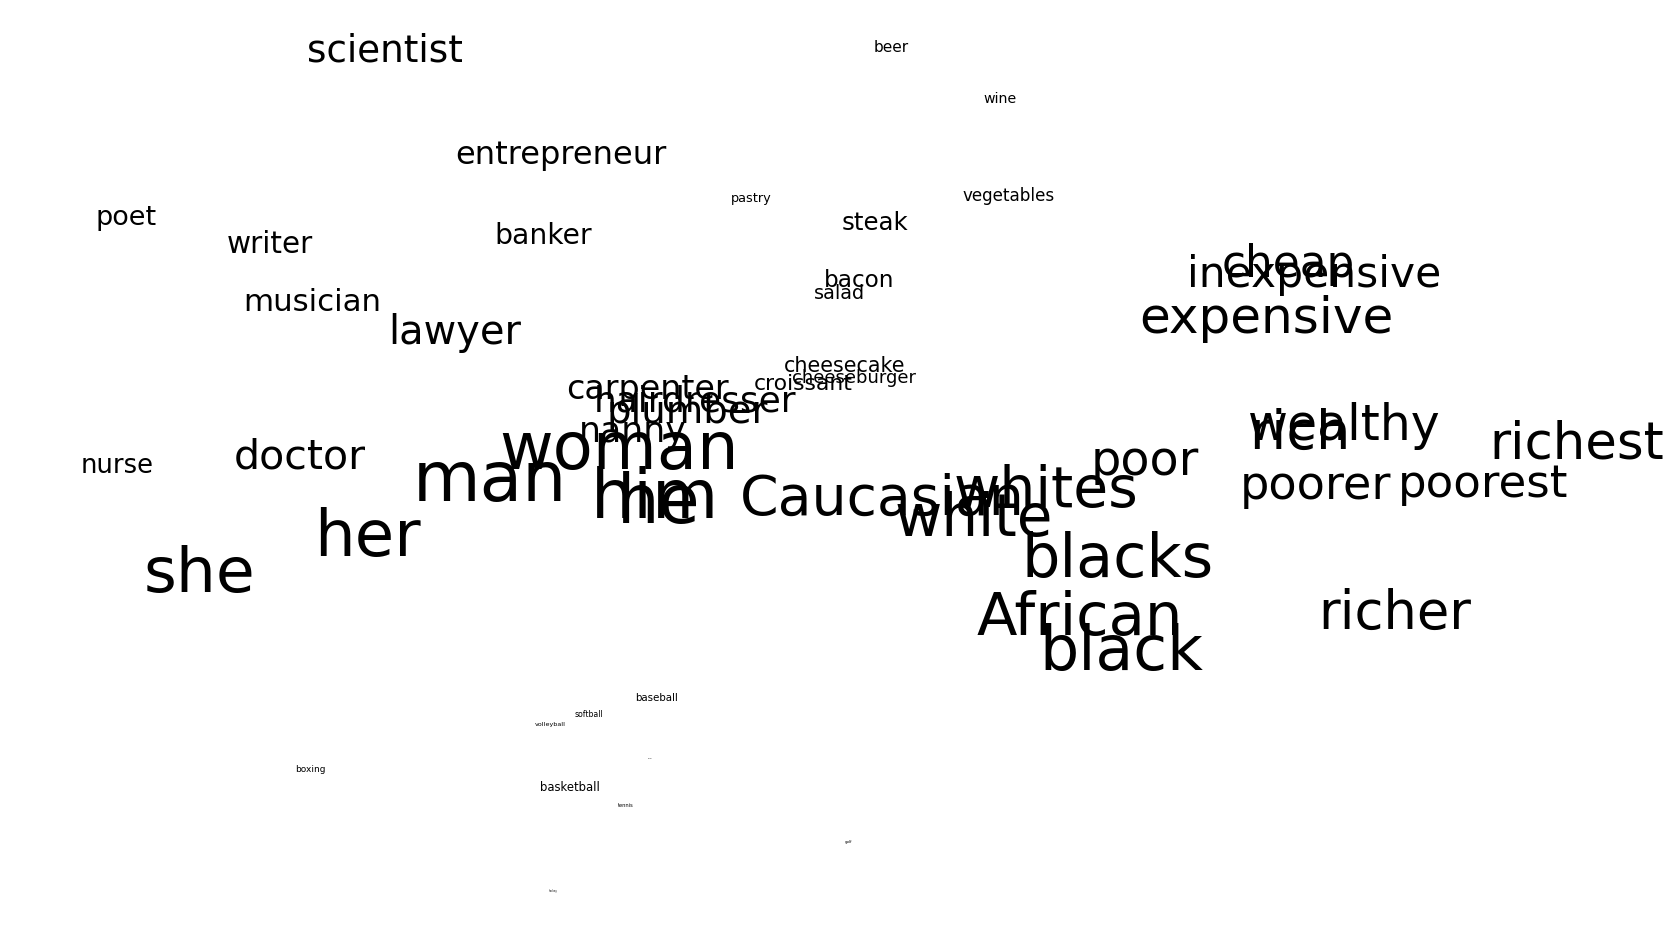

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNYT[:, 0], tsneWordsNYT[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsNYT[:, 0][i],tsneWordsNYT[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

Define some convenient functions for getting dimensions.

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Let's calculate three dimensions: gender, race, and class.

In [ ]:
Gender = dimension(nytimes_model, ['man','him','he'], ['woman', 'her', 'she'])
Race = dimension(nytimes_model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
Class = dimension(nytimes_model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])

Here we have some words.

In [ ]:
Occupations = ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"]

Foods = ["steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry"]

Sports  = ["basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]

Define a function to project words in a word list to each of the three dimensions.

In [ ]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pd.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

Get the projections.

In [ ]:
OCCdf = makeDF(nytimes_model, Occupations)
Fooddf = makeDF(nytimes_model, Foods)
Sportsdf = makeDF(nytimes_model, Sports)

Define some useful functions for plotting.

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Plot the occupational words in each of the three dimensions.

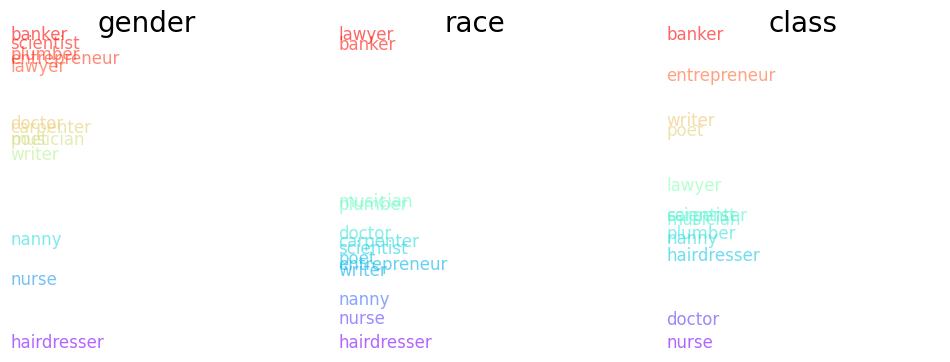

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

Foods:

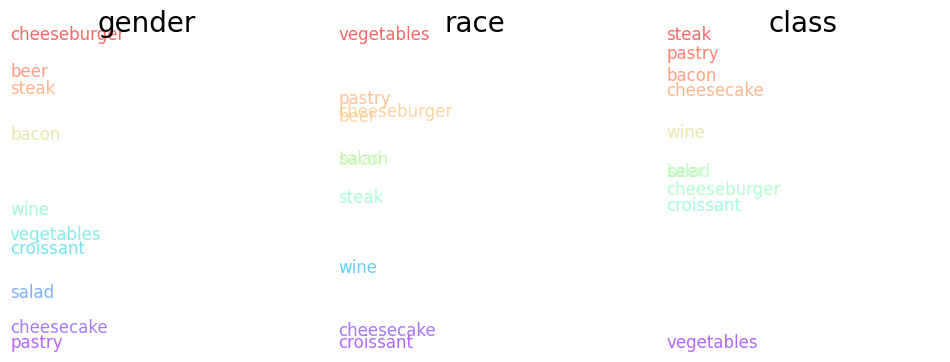

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

Sports:

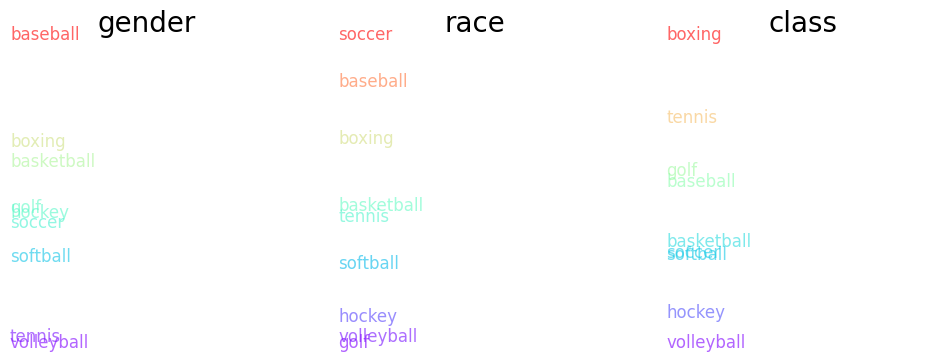

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why?

<font color="red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

In [159]:
# Video game-related professions and items
videoGameTargetWords = ['designer', 'programmer', 'writer', 'player', 'cosplayer', 'streamer',
                        'keyboard', 'mouse', 'controller', 'computer', 'monitor', 'speaker',
                        'exploration', 'adventure', 'RPG', 'strategy', 'shooter', 'stealth']
wordsSubMatrix = []
for word in videoGameTargetWords:
    if word in reviewsW2V.wv:
        wordsSubMatrix.append(reviewsW2V.wv[word])

wordsSubMatrix = np.array(wordsSubMatrix)

In [172]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

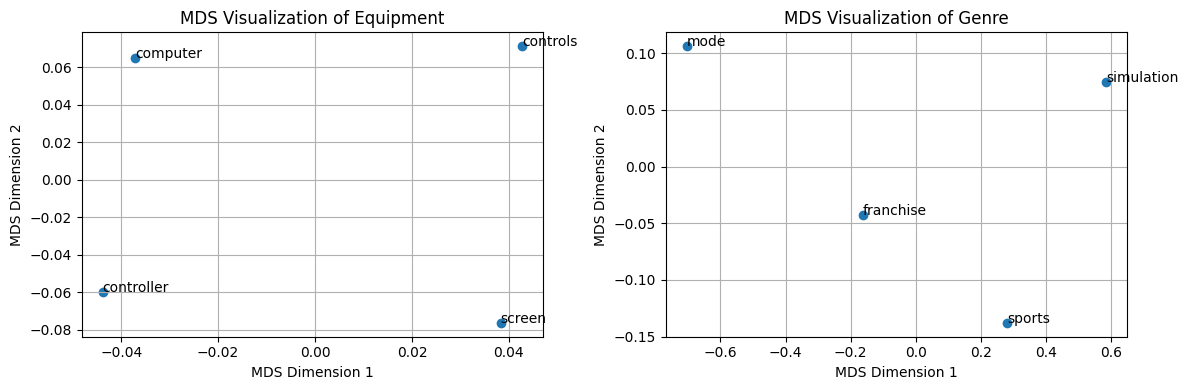

In [218]:
from gensim.models import Word2Vec
from sklearn.manifold import MDS
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'reviewsW2V' is already defined and contains the Word2Vec model

# Define the terms in each dimension
equipment_positives = ['controls', 'controller']
equipment_negatives = ["computer", "screen"]
genre_positives = ['sports', 'simulation']
genre_negatives = ["franchise", "mode"]

# Combine terms for Equipment and Genre
equipment_terms = equipment_positives + equipment_negatives
genre_terms = genre_positives + genre_negatives

# Function to compute MDS and plot for a given dimension
def plot_mds(ax, terms, title):
    # Extract embeddings for the terms
    embeddings = [reviewsW2V.wv[term] for term in terms]

    # Compute pairwise distances between terms
    distances = np.zeros((len(terms), len(terms)))
    for i in range(len(terms)):
        for j in range(len(terms)):
            distances[i][j] = np.linalg.norm(embeddings[i] - embeddings[j])

    # Apply MDS to reduce dimensions
    mds = MDS(n_components=2, dissimilarity='precomputed')
    embeddings_2d = mds.fit_transform(distances)

    # Plot the embeddings
    ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

    # Annotate points with terms
    for i, term in enumerate(terms):
        ax.annotate(term, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

    ax.set_xlabel('MDS Dimension 1')
    ax.set_ylabel('MDS Dimension 2')
    ax.set_title(title)
    ax.grid(True)

# Create subplots for Equipment and Genre
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot MDS for Equipment
plot_mds(ax1, equipment_terms, 'MDS Visualization of Equipment')

# Plot MDS for Genre
plot_mds(ax2, genre_terms, 'MDS Visualization of Genre')

plt.tight_layout()
plt.show()

**This is pretty much useless and not well-adapted for my data. Partially due to the limits of Word2Vec in this case.**

####**Equipment technically explains more variance but, again, it's not useful here. So I won't continue this analysis further.**
*Note:* The demonstrated way of embedding does not work with my dataset, due to how it is structured. So I had to use this alternate way. That's why no pretty formatting :(

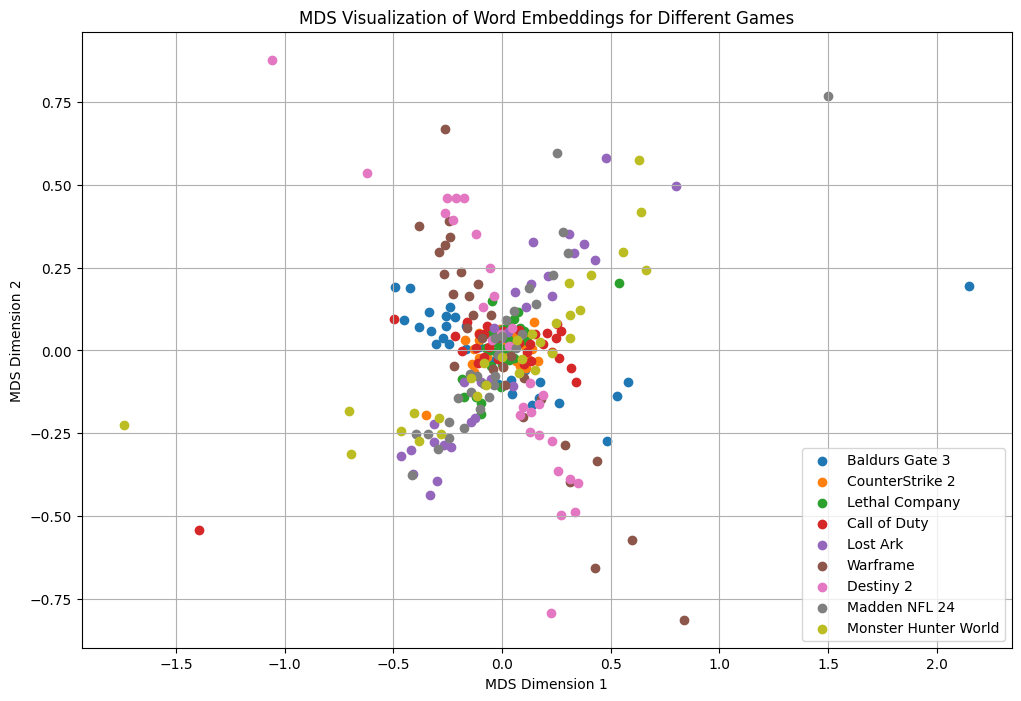

In [232]:
import gensim
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Define a list of unique game names
game_names = reviews_df['GameName'].unique()

# Create a figure and axis object for the plot
plt.figure(figsize=(12, 8))

# Iterate over each game name
for game_name in game_names:
    # Filter the DataFrame for the current game
    filtered_reviews_df = reviews_df[reviews_df['GameName'] == game_name]

    # Ensure each item in 'normalized_tokens' is a list of words
    normalized_sentences = filtered_reviews_df['filtered_tokens'].tolist()

    # Train Word2Vec model using the dataset for the current game
    reviewsW2V = gensim.models.word2vec.Word2Vec(normalized_sentences, sg=0)

    # Get the first thirty words in the vocabulary
    vocab = reviewsW2V.wv.index_to_key[:30]

    # Extract embeddings for the first thirty words
    embeddings = [reviewsW2V.wv[word] for word in vocab]

    # Compute pairwise distances between words
    distances = np.zeros((len(vocab), len(vocab)))
    for i in range(len(vocab)):
        for j in range(len(vocab)):
            distances[i][j] = np.linalg.norm(embeddings[i] - embeddings[j])

    # Apply MDS to reduce dimensions
    mds = MDS(n_components=2, dissimilarity='precomputed')
    embeddings_2d = mds.fit_transform(distances)

    # Plot the embeddings for the current game
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], label=game_name)

# Add legend
plt.legend()

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Visualization of Word Embeddings for Different Games')
plt.grid(True)
plt.show()

**This is a more informative version of comparison across relevant categories, given my data. All in all, this captures the most variation (or at least, meaningful variation), because it offers insight into the direction of the differences quite interpretably.**

####**Informatively, it seems like dimensions can be made such that the center captures the center of each game's W2Vec models. This indicates a degree of similarity in the vast content of each game's reviews, with differentiations (a) being very different, on average; and (b) varying in the _kinds_ of differences for the most part, across games (less so for similar games). This suggests that semantic dimensions could be established based on genre (or other factors) in line with the example, assuming a different vectorization method (than one I have available currently); or a different dataset (which seems unlikely).**

# Linguistic Change or Difference

Below is code that aligns the dimensions of multiple embeddings arrayed over time or some other dimension and allow identification of semantic chanage as the word vectors change their loadings for focal words. This code comes from the approach piloted at Stanford by William Hamilton, Daniel Jurafsky and Jure Lescovec [here](https://arxiv.org/pdf/1605.09096.pdf).

In [ ]:
import copy

In [37]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    # base_vecs = calc_syn0norm(in_base_embed)
    # other_vecs = calc_syn0norm(in_other_embed)
    base_vecs= [in_base_embed.wv.get_vector(w,norm=True) for w in set(in_base_embed.wv.index_to_key)]
    other_vecs= [in_other_embed.wv.get_vector(w,norm=True) for w in set(in_other_embed.wv.index_to_key)]

    # just a matrix dot product with numpy
    m = np.array(other_vecs).T.dot(np.array(base_vecs))
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v)
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.vectors =(np.array(other_vecs)).dot(ortho)
    return other_embed

def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count")  + m2.wv.get_vecattr(w, "count") ,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        new_arr = [m.wv.get_vector(w,norm=True) for w in common_vocab]

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        # old_vocab = m.wv.index_to_key
        new_vocab = []
        k2i={}
        for new_index,word in enumerate(common_vocab):
            new_vocab.append(word)
            k2i[word]=new_index
        m.wv.index_to_key=new_vocab
        m.wv.key_to_index=k2i
        m.wv.vectors=np.array(new_arr)

    return (m1,m2)

In order to explore this, let's get some data that follows a time trend. We'll look at conference proceedings from the American Society for Clinical Oncologists.

In [ ]:
apsDF = pd.read_csv("APSabstracts1950s.csv", index_col=0)

Prepare for wor2vec:

In [ ]:
apsDF['tokenized_sents'] = apsDF['abstract'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
apsDF['normalized_sents'] = apsDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
apsDF.head()

,copyrightYear,doi,abstract,tokenized_sents,normalized_sents
0,1950,10.1103/RevModPhys.22.221,A summarizing account is given of the research...,"[[A, summarizing, account, is, given, of, the,...","[[summarizing, account, given, research, bariu..."
1,1951,10.1103/RevModPhys.23.147,New tables of coulomb functions are presented ...,"[[New, tables, of, coulomb, functions, are, pr...","[[new, tables, coulomb, functions, presented, ..."
2,1951,10.1103/RevModPhys.23.185,Ionization by electron impact in diatomic gase...,"[[Ionization, by, electron, impact, in, diatom...","[[ionization, electron, impact, diatomic, gase..."
3,1951,10.1103/RevModPhys.23.203,It is shown that the conductivity in the ohmic...,"[[It, is, shown, that, the, conductivity, in, ...","[[shown, conductivity, ohmic, cuprous, oxide, ..."
4,1951,10.1103/RevModPhys.23.21,The factorization method is an operational pro...,"[[The, factorization, method, is, an, operatio...","[[factorization, method, operational, procedur..."


We will be creating many embeddings so we have created this function to do most of the work. It creates two collections of embeddings, one the original and one the aligned.

In [38]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [39]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

Now we generate the models:

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(apsDF, 'copyrightYear')

In [ ]:
rawEmbeddings.keys()

dict_keys([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959])

We need to compare them across all permutions so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intitive range of 0-2 with low values meaning little change and high meaning lots of change.

In [40]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0].wv[word], axis = 0),
                                                                             np.expand_dims(embed.wv[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

Lets look at a couple words:

radioactive


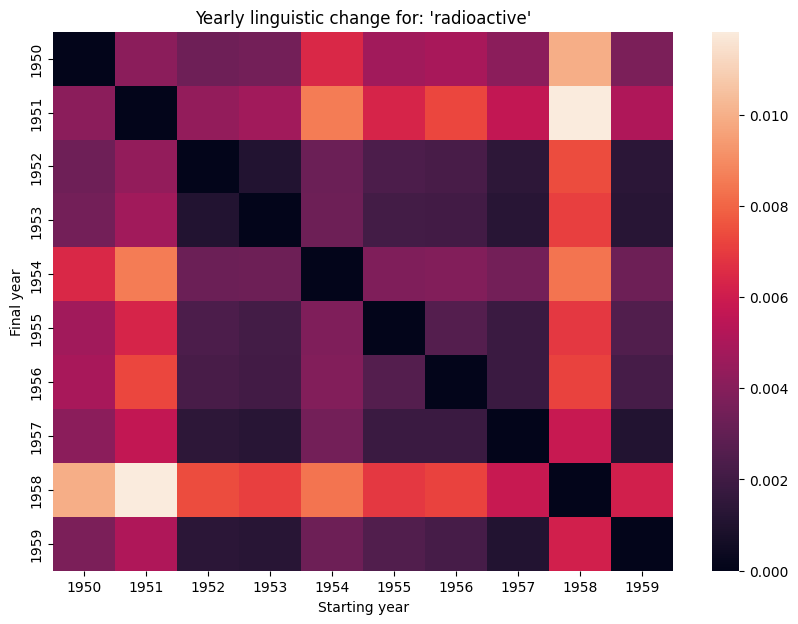

In [ ]:
targetWord = 'radioactive'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

area


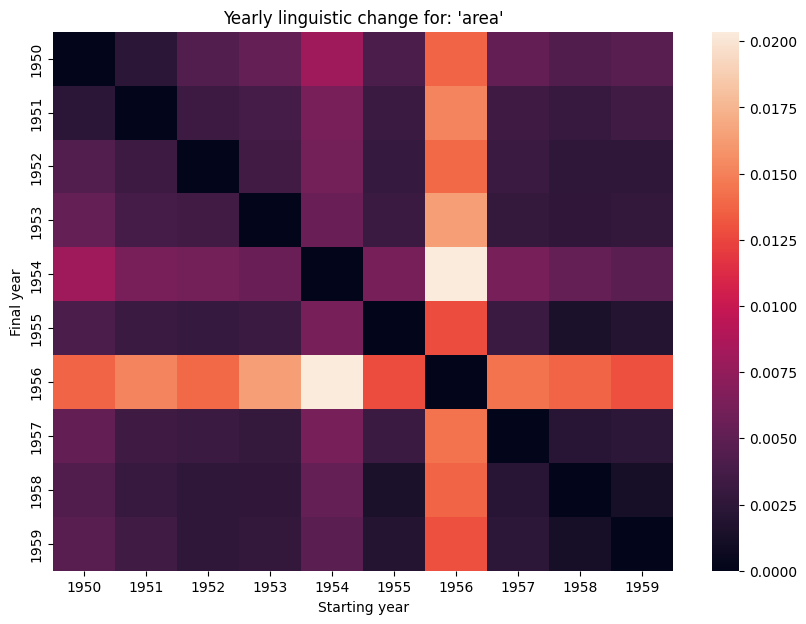

In [ ]:
targetWord = 'area'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [41]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))

    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        try:
            dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0].wv[word], axis = 0), np.expand_dims(embed.wv[word], axis = 0))[0,0])
        except:
            pass
    return np.mean(dists)

def findMostDivergent(embeddingsDict):
    original_words = comparedEmbeddings[1950][0].wv.index_to_key
    for embeds in embeddingsDict.values():
        for embed in embeds:
            original_words = set(original_words).intersection(set(embed.wv.index_to_key))
    words = set(original_words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)


In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

The most divergent words are:

In [ ]:
wordDivergences[:20]

[('view', 0.999999717733336),
 ('application', 0.999999282083872),
 ('detail', 0.9999992307826308),
 ('analysis', 0.4096437457966807),
 ('consistent', 0.40922589674974086),
 ('low', 0.40518287841565337),
 ('hamiltonian', 0.3304787203018783),
 ('charge', 0.3161395451584156),
 ('found', 0.31411757973429316),
 ('chemical', 0.3133659305720613),
 ('activity', 0.3096330310631103),
 ('total', 0.3083859531123906),
 ('calculated', 0.3078164709766611),
 ('path', 0.30707537501447446),
 ('parity', 0.3064259527503047),
 ('follows', 0.3061744133789176),
 ('motion', 0.3060941062675724),
 ('f', 0.305222539484852),
 ('discussed', 0.30521335720672305),
 ('probably', 0.30470073992842545)]

And the least:

In [ ]:
wordDivergences[-20:]

[('units', 0.00363314151763916),
 ('scintillation', 0.003612661361694336),
 ('method', 0.003610867261886597),
 ('ferromagnetic', 0.0036017894744873047),
 ('covariant', 0.0035503625869750975),
 ('interest', 0.0035391867160797117),
 ('voltage', 0.0035223841667175295),
 ('domain', 0.003520643711090088),
 ('angular', 0.0035077393054962157),
 ('targets', 0.003493255376815796),
 ('systematic', 0.0034675121307373045),
 ('spectrum', 0.0034127593040466308),
 ('cm-1', 0.0032790958881378173),
 ('additional', 0.003272044658660889),
 ('tensor', 0.0032386481761932373),
 ('square', 0.0032058417797088622),
 ('collisions', 0.003199738264083862),
 ('g', 0.003012639284133911),
 ('transitions', 0.002928513288497925),
 ('presented', 0.002751326560974121)]

resolution


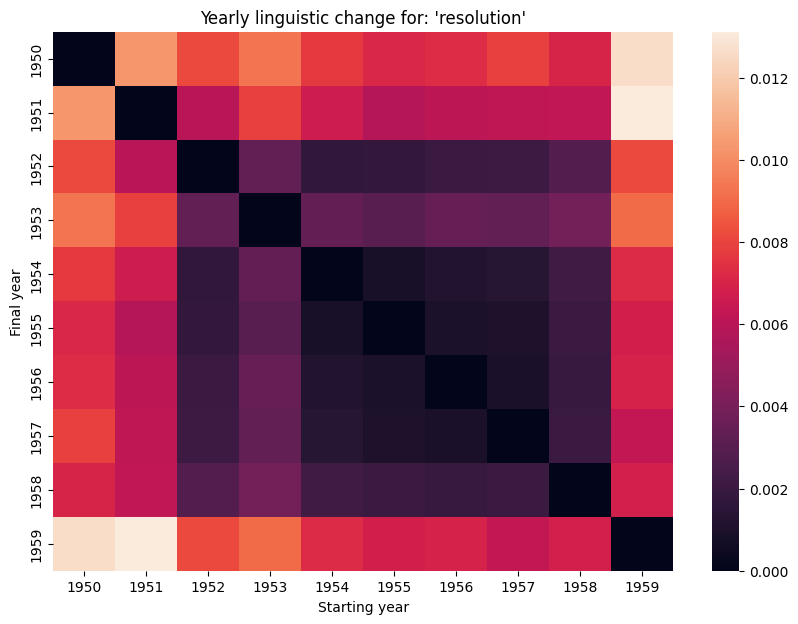

In [ ]:
targetWord = wordDivergences[-200][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

presented


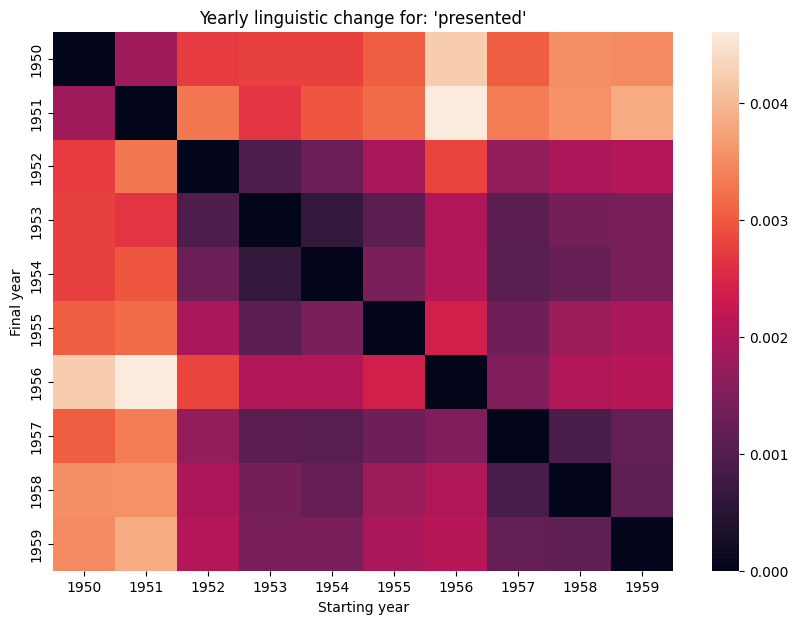

In [ ]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
##We only use a small data here so some of the results may not make sense. You can try the algorithm on your own data!

## COHA

COHA is a historial dataset so it ends up being a good choice to try the same analysis we just did across three different time periods.

We will be using the same data loading procedure as the last notebook, so go through the process to make sure you know what's going on.

In [ ]:
corpora_address = "COHA"

In [ ]:
coha_texts = lucem_illud.loadDavies(corpora_address, return_raw=True)

text_1810s_kso.zip
text_1820s_jsi.zip
text_1830s_bsu.zip
text_1840s_nsq.zip
text_1850s_jpr.zip
text_1860s_psi.zip
text_1870s_vuy.zip
text_1880s_azz.zip
text_1890s_jsq.zip
text_1900s_mse.zip
text_1910s_jue.zip
text_1920s_gte.zip
text_1930s_bie.zip
text_1940s_bsw.zip
text_1950s_ndz.zip
text_1960s_xus.zip
text_1970s_jfy.zip
text_1980s_bkk.zip
text_1990s_bsj.zip
text_2000s_scc.zip


Cool - let us now create our different epochs. This is an important step: I will be using the same 5 epochs I did in the DTM example, but you are recommended to play around with this. I will create a dataframe which logs the year and the genre.

In [ ]:
coha_df = pd.DataFrame(columns=["Year", "Genre", "Epoch", "normalized sents"])

In [ ]:
for article in coha_texts:
    genre, year, id_ = article.split("_")

    year = int(year)

    if year > 1810 and year < 1880:
        epoch = 0
    if year >= 1880 and year < 1913:
        epoch = 1
    if year >= 1913 and year < 1950:
        epoch = 2
    if year >= 1950 and year < 1990:
        epoch = 3
    if year >= 1990:
        epoch = 4

    try:
        if len(coha_texts[article][2]) < 1500000:
            coha_df.loc[id_] = [year, genre, epoch, lucem_illud.normalizeTokens(coha_texts[article][2].decode("utf-8"), lemma=False)]
    except TypeError:
        continue
    except IndexError:
        continue

We can now arrange our word embeddings by either year, genre, or epoch, and see how the words in each of those contexts change.

In [ ]:
rawEmbeddings_epoch = rawModels(coha_df, 'Epoch', text_column_name='normalized sents')

In [ ]:
# rawEmbeddings_genre = rawModels(coha_df, 'Genre', text_column_name='normalized sents')

We now have the raw embeddings for epoch and genre. You can test out the previous analysis on words of your choice.

In [ ]:
for epoch, embedding in enumerate(rawEmbeddings_epoch):
    model = rawEmbeddings_epoch[embedding]
    name = "embedding_epoch_" + str(epoch)
    model.save(name)

In [ ]:
# for embedding in rawEmbeddings_genre:
#     model = rawEmbeddings_genre[embedding]
#     name = "embedding_genre_" + embedding
#     model.save(name)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
def file_to_embeddings(address, kind):
    rawEmbeddings = {}
    for file in os.listdir(address):
        if "embedding_"+kind in file:
            e, kind_, kind_type = file.split("_")
            kind_type = eval(kind_type)
            rawEmbeddings[kind_type] = Word2Vec.load(file)
    return rawEmbeddings

In [ ]:
# rawEmbeddings_genre_load = file_to_embeddings(".", "genre")

In [ ]:
rawEmbeddings_epoch_load = file_to_embeddings(".", "epoch")

In [ ]:
rawEmbeddings_epoch_load.keys()

In [ ]:
rawEmbeddings_epoch, compared_epoch = compareModels(coha_df, 'Epoch', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_epoch_load)

In [ ]:
# rawEmbeddings_genre, compared_genre = compareModels(coha_df, 'Genre', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_genre_load)

You now have access to the epoch wise embeddings, and the code to train models genre wise (commented out). You can use the original embeddings, the compared embeddings and such to perform the analysis we did before.

## <font color="red">*Exercise 4*</font>

<font color="red">Construct cells immediately below this that align word embeddings over time or across domains/corpora. Interrogate the spaces that result and ask which words changed most and least over the entire period or between contexts/corpora. What does this reveal about the social game underlying your space?

There is much more we do not have time to cover on word embeddings. If you are interested in other ways to align word embeddings, take a look at the [Dynamic Word Embeddings (DTM) section from the Thinking with Deep Learning course](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=COS_n2RFCJNk) or using the more recent [Temporal Word Embeddings with a Compass (TWEC) package](https://github.com/valedica/twec). There is also a useful section on [debiasing word embeddings](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=JHQ--EsWoxGM), such as the famous, ["Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings"](https://arxiv.org/abs/1607.06520) paper. Below, we include an optional section on topic modeling with word embeddings, which could be useful for final projects.

**I'll break the time points into quarters (there are 300 time points in the actual data, so not very readable):**

In [67]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
import ast

# Load your dataset (assuming you've already loaded reviews_df)

# Sort unique dates and convert them into a list
unique_dates = sorted(reviews_df['Date'].unique())

# Calculate the cutoff indices for each quarter
num_dates = len(unique_dates)
quarter1_cutoff = num_dates // 4
quarter2_cutoff = quarter1_cutoff * 2
quarter3_cutoff = quarter1_cutoff * 3

# Extract the dates corresponding to each quarter
Q1_dates = unique_dates[:quarter1_cutoff]
Q2_dates = unique_dates[quarter1_cutoff:quarter2_cutoff]
Q3_dates = unique_dates[quarter2_cutoff:quarter3_cutoff]
Q4_dates = unique_dates[quarter3_cutoff:]

# Function to compute Word2Vec embeddings for a given date
def compute_embeddings(df, dates):
    # Filter data for the given dates
    data_subset = df[df['Date'].isin(dates)]
    # Flatten tokens into sentences
    sentences = data_subset['filtered_tokens'].tolist()
    # Train Word2Vec model
    model = Word2Vec(sentences=sentences, sg=0)  # Skip-gram model
    return model

# Compute embeddings for each quarter
embedding_models = {}
embedding_models['Q1'] = compute_embeddings(reviews_df, Q1_dates)
embedding_models['Q2'] = compute_embeddings(reviews_df, Q2_dates)
embedding_models['Q3'] = compute_embeddings(reviews_df, Q3_dates)
embedding_models['Q4'] = compute_embeddings(reviews_df, Q4_dates)

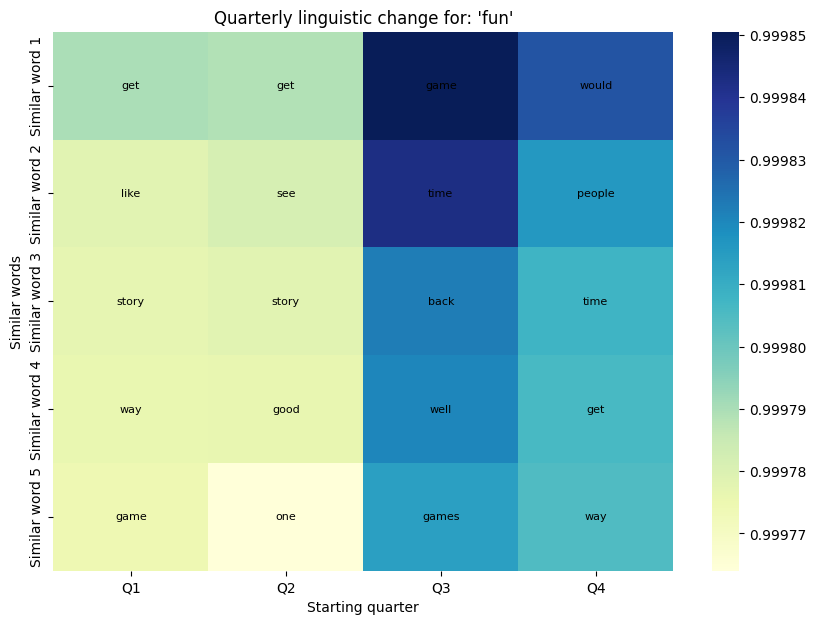

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute the divergence DataFrame
def getDivergenceDF(word, embeddingsDict):
    dists = {}
    similar_words = {}  # Store similar words for each quarter
    quarters = list(embeddingsDict.keys())
    for quarter in quarters:
        dists[quarter] = []
        similar_words[quarter] = []
        try:
            # Get the most similar words to 'fun' in the current quarter
            most_similar_words = embeddingsDict[quarter].wv.most_similar(word, topn=5)
            for similar_word, similarity in most_similar_words:
                dists[quarter].append(similarity)
                similar_words[quarter].append(similar_word)
        except KeyError:
            print(f"Word '{word}' not found in quarter '{quarter}'.")
            dists[quarter] = [None] * 5  # Add None if word not found
            similar_words[quarter] = [None] * 5
        except TypeError as e:
            print(f"TypeError: {e}")
            dists[quarter] = [None] * 5  # Add None if TypeError occurs
            similar_words[quarter] = [None] * 5
    return pd.DataFrame(dists, index=[f"Similar word {i+1}" for i in range(5)]), similar_words

# Define the target word
targetWord = 'fun'

# Compute the divergence DataFrame
pltDF, similar_words = getDivergenceDF(targetWord, embedding_models)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(pltDF, ax=ax, annot=False, cmap="YlGnBu")

# Annotate each cell with the similar words
for i, quarter in enumerate(pltDF.columns):
    for j, similarity in enumerate(pltDF.index):
        if not pd.isnull(pltDF.iloc[j, i]) and similar_words[quarter][j] is not None:
            similar_word_text = similar_words[quarter][j]
            ax.text(i + 0.5, j + 0.5, similar_word_text, ha='center', va='center', color='black', fontsize=8)

ax.set_xlabel("Starting quarter")
ax.set_ylabel("Similar words")
ax.set_title("Quarterly linguistic change for: '{}'".format(targetWord))
plt.show()

**There are some consistencies over time concerning the words with the highest cosine similarity with "fun," but some really significant shifts. Specifically, the shift from earlier time points where "story" had one of the highest cosine similarities to the latest time point, where "people" take center-stage. This suggests there was likely a shift in priorities from singleplayer-based content to multiplayer-based content, which is crucial to know!**

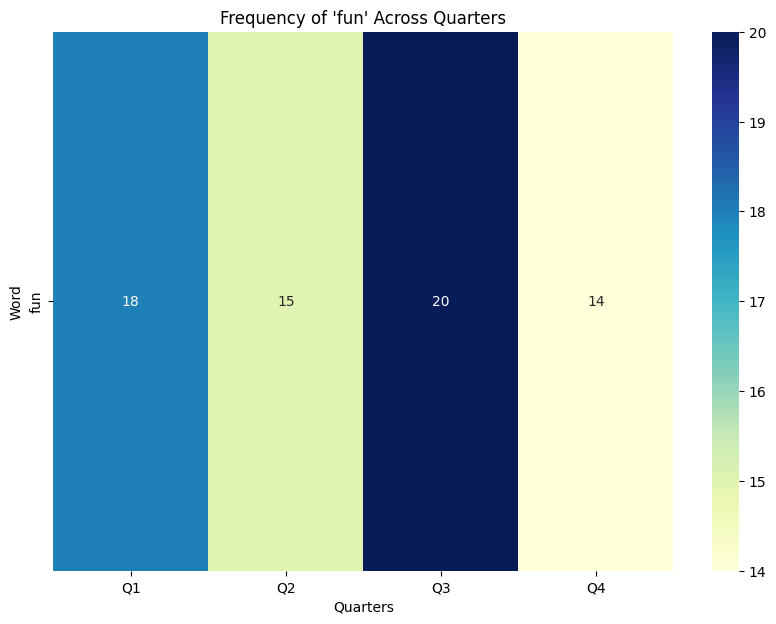

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute the frequency DataFrame
def getFrequencyDF(word, embeddingsDict):
    frequencies = {}
    quarters = list(embeddingsDict.keys())
    for quarter in quarters:
        frequencies[quarter] = []
        try:
            # Compute the frequency of the word in the current quarter
            word_frequency = embeddingsDict[quarter].wv.key_to_index.get(word, 0)
            frequencies[quarter].append(word_frequency)
        except KeyError:
            print(f"Word '{word}' not found in quarter '{quarter}'.")
            frequencies[quarter] = [None]  # Add None if word not found in quarter
        except TypeError as e:
            print(f"TypeError: {e}")
            frequencies[quarter] = [None]  # Add None if TypeError occurs
    return pd.DataFrame(frequencies, index=[word])

# Define the target word
targetWord = 'fun'

# Compute the frequency DataFrame
pltDF = getFrequencyDF(targetWord, embedding_models)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(pltDF, ax=ax, annot=True, cmap="YlGnBu")

ax.set_xlabel("Quarters")
ax.set_ylabel("Word")
ax.set_title("Frequency of '{}' Across Quarters".format(targetWord))
plt.show()

**This is a very basic analysis, but this kind of analysis can be useful for showing very interpretable shifts in terminology. There doesn't seem to be a clear trend here, but with other terms there might be.**

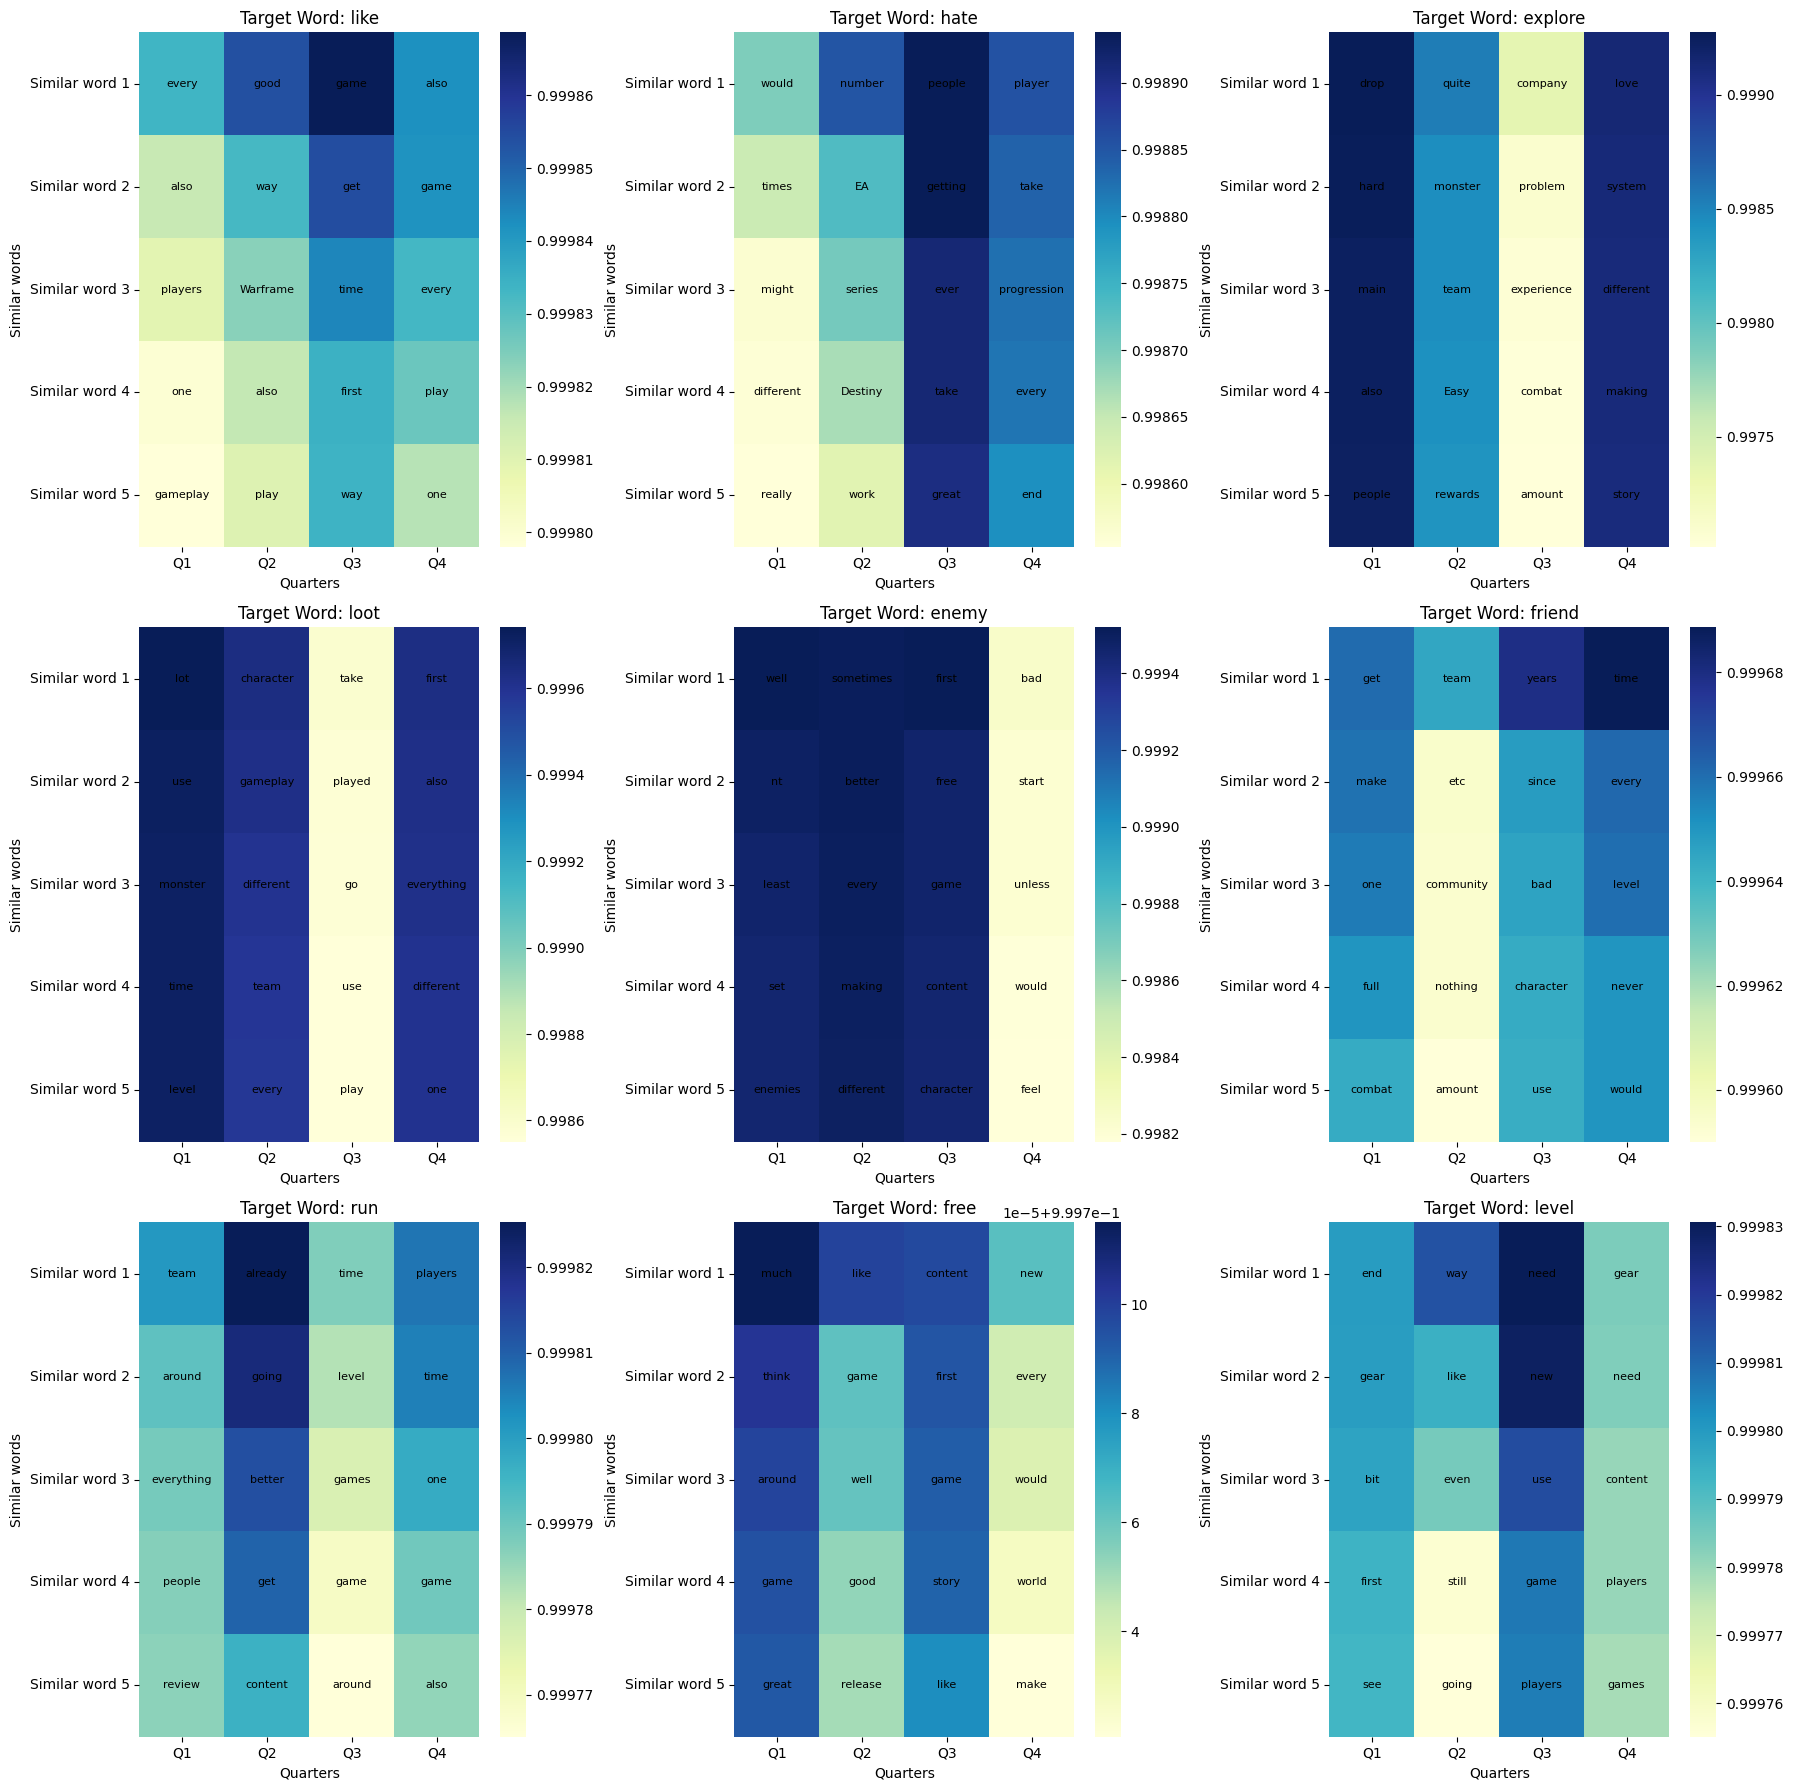

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute the divergence DataFrame
def getDivergenceDF(word, embeddingsDict):
    dists = {}
    similar_words = {}  # Store similar words for each quarter
    quarters = list(embeddingsDict.keys())
    for quarter in quarters:
        dists[quarter] = []
        similar_words[quarter] = []
        try:
            # Get the most similar words to the target word in the current quarter
            most_similar_words = embeddingsDict[quarter].wv.most_similar(word, topn=5)
            for similar_word, similarity in most_similar_words:
                dists[quarter].append(similarity)
                similar_words[quarter].append(similar_word)
        except KeyError:
            print(f"Word '{word}' not found in quarter '{quarter}'.")
            dists[quarter] = [None] * 5  # Add None if word not found
            similar_words[quarter] = [None] * 5
        except TypeError as e:
            print(f"TypeError: {e}")
            dists[quarter] = [None] * 5  # Add None if TypeError occurs
            similar_words[quarter] = [None] * 5
    return pd.DataFrame(dists, index=[f"Similar word {i+1}" for i in range(5)]), similar_words

# Define the target words for each quarter
target_words = ["like", "hate", "explore", "loot", "enemy", "friend", "run", "free", "level"]

# Plot the heatmaps
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
for i, ax in enumerate(axes.flatten()):
    target_word = target_words[i]
    pltDF, similar_words = getDivergenceDF(target_word, embedding_models)
    sns.heatmap(pltDF, ax=ax, annot=False, cmap="YlGnBu")

    # Annotate each cell with the similar words
    for j in range(len(pltDF)):
        for k in range(len(pltDF.columns)):
            if similar_words[pltDF.columns[k]][j] is not None:
                ax.text(k + 0.5, j + 0.5, similar_words[pltDF.columns[k]][j],
                        ha='center', va='center', color='black', fontsize=8)

    ax.set_xlabel("Quarters")
    ax.set_ylabel("Similar words")
    ax.set_title(f"Target Word: {target_word}")

plt.tight_layout()
plt.show()

**Many of these are not terribly informative (e.g., "level" shows a pretty consistent focus on content), but there are some noteworthy trends. For instance, people seem to appreciate greater diversity later on in time (which makes sense based on my sense that game consumers are growing frustrated with minimal changes between types of games as of late). Also, "run" is interesting, because it shows a shift from running being talked about in the sense of gameplay (like running around) to running of the game, showing an increased concern over technical details in the fourth quarter. Presumably it'd be informative to look at differences in these between games, but I'll leave that for the project.**

## Optional: Topic modeling with word embeddings

Recently computer scientists have developed methods to cluster word embeddings, which can be viewed as a topic model, an embedding-based version of conventional topic models that use the document-term matrix (e.g., LDA). One method is Discourse Atoms, first described by Princeton NLP researchers ([Arora et al. 2018](https://arxiv.org/abs/1601.03764)). This uses k-SVD, a generalization of the k-means clustering algorithm to identify topic-like vectors in the n-dimensional word embedding space. Below is code adapted from the first social science paper using Discourse Atoms, [Arseniev-Koehler et al. 2021](https://osf.io/preprints/socarxiv/nkyaq/). It takes as input _gensim_ word vectors.

You are not required to implement this, but for class projects or your own research, this can be more useful than conventional topic models. It runs faster, produces more detailed topics, and in general makes use of more information (i.e., word order within a document) than do conventional topic models. Note there are at least 4 other papers with methods for word embedding clusters:

- Xun, Li, Zhao, Gao, and Zhang 2017: [multivariate Gaussian distributions](https://www.ijcai.org/proceedings/2017/588)
- Dieng, Ruiz, and Blei 2019: ["Embedding Topic Model (ETM)"](https://arxiv.org/abs/1907.04907)
- Angelov 2020: ["Top2Vec"](https://arxiv.org/abs/2008.09470)
- Sia, Dalmia, and Mielke 2020: [(spherical) k-means, k-medoids, von Mises-Fisher Models, Gaussian Mixture Models](https://arxiv.org/abs/2004.14914)

Let's implement the Discourse Atoms method.

In [ ]:
from gensim.test.utils import datapath
import re
import string, re
import cython

In [ ]:
# The ksvd package has a convenient Approximate k-SVD function.
!pip install ksvd

In [ ]:
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from random import seed, sample
from ksvd import ApproximateKSVD #pip or conda install ksvd #this is key!

In [ ]:
import pickle

In [ ]:
import math

In [ ]:
# Load a gensim word2vec model
w2v = senReleasesW2V

#### k-SVD

We then perform a K-SVD on the word embedding matrix to learn topics in such a way where each word-vector is represented as a spare linear combination of topics. To generate a good representation of the original word vector space, we want to minimize the difference between our word vectors and the vectors generated as a linear combination of topics.




In [ ]:
#### TRAIN MODEL:

#n_comp: Number of topics (i.e., atoms, or dictionary elements)
#n_nonzeros: Number of nonzero coefficients to target (how many atoms each word can load onto)

##create the saving folder if you need!!

def do_aksvd(w2vmodel, n_comp, n_nonzeros, save=False, savelocation='/content/aksvd_models/'):
    #https://github.com/nel215/ksvd #takes about 2 min on Alina's laptop for 30 atoms
    aksvd_t = ApproximateKSVD(n_components=n_comp, transform_n_nonzero_coefs=n_nonzeros) #also may adjuste n iter which is default at 10, and tolerance for error which is default at  tol=1e-6 #n_components is number of discourse atoms, since vocab size is smallish, keep this fewer. transform_n is the number of atoms (components) that a word can be a linear combo of
    dictionary_t = aksvd_t.fit(w2vmodel.wv.vectors).components_ # Dictionary is the matrix of discourse atoms.
    alpha_t = aksvd_t.transform(w2vmodel.wv.vectors) #get the alphas, which are the "weights" of each word on a discourse atoms

    if save==True:
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_aksvd_nvdrsdf20','wb')
        pickle.dump(aksvd_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' +str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_dictionary_nvdrsdf20','wb')
        pickle.dump(dictionary_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_alpha_nvdrsdf20','wb')
        pickle.dump(alpha_t,outfile)
        outfile.close()
    return(dictionary_t, alpha_t)

Two quick quality checks. These are useful to choose the number of atoms in the dictionary (i.e., number of topics): $R^2$ and Topic Diversity

Useful to look at product of the two since $R^2$ tends to increase with higher # topics, as Topic Diversity decreases. Intuition: more topics can better explain the original semantic space, but also then these topics are less distinct from one another. As a result, we typically want a balance between the two.

In [ ]:
def reconst_qual(w2vmodel, dictionary_mat, alpha_mat):
    #reconstruct the word vectors
    reconstructed = alpha_mat.dot(dictionary_mat) #reconstruct word vectors and add back in mean(?). but note that reconstructed norm is still around 0-1, not 1, is that an issue?
    #e1 = norm(w2vmodel.wv.vectors - reconstructed) #total reconstruction error, larger means MORE error. norm as specified here takes frobenius norm of error matrix.


    #total VARIANCE in the data: sum of squares
    squares3= w2vmodel.wv.vectors-np.mean(w2vmodel.wv.vectors, axis=1).reshape(-1,1) #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sst3= np.sum([i.dot(i) for i in squares3] ) #same as below

    sst3= np.sum(np.square(squares3))


    #total sum of squared ERRORS/residuals
    e3= [reconstructed[i]-w2vmodel.wv.vectors[i] for i in range(0,len(w2vmodel.wv.vectors))]  #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sse3= np.sum([i.dot(i) for i in e3] ) #same as below
    sse3= np.sum(np.square(e3))

    #R^2: 1- (SSE / SST )
    r2= 1- (sse3 /  sst3) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error


    #compute root mean square error
    rmse=  math.sqrt(np.mean(np.square(e3)))



    return(sse3, rmse, r2) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error

#### Inferring topics from document

We now use a similar approach to what we saw a little earlier, where we inverted our generative model to see which documents belong to which class - we do the same now, but with discourse atoms instead of the whole model. This process tells us the topic most likely to have generated a specific context (document).



In [ ]:
#topic diversity (% unique words among total closest 25 words to each atom)
def topic_diversity(w2vmodel, dictionary_mat, top_n=25):

    topwords=[] #list of list, each innter list includes top N words in that topic

    for i in range(0, len(dictionary_mat)): #set to number of total topics
        topwords.extend([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary_mat[i],topn=top_n)]) #set for top N words
        #print(w2vmodel.wv.similar_by_vector(dictionary[i],topn=N))

    uniquewords= set(topwords)
    diversity = len(uniquewords)/len(topwords)
    return(diversity)

In [ ]:
##make sure to create a saving path first

dictionary, alpha = do_aksvd(w2v, 150, 5, save=True)

In [ ]:
topic_diversity(w2v, dictionary, top_n=25)

0.8034666666666667

In [ ]:
reconst_qual(w2v, dictionary, alpha)


(16714.18224838863, 0.11030937541961874, 0.868297053345052)

In [ ]:
#loading back in the model pieces if not already in

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_dictionary_nvdrsdf20','rb')
# dictionary=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_aksvd_nvdrsdf20','rb')
# aksvd=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_alpha_nvdrsdf20','rb')
# alpha=pickle.load(infile)
# infile.close()

In [ ]:
for i in range(0, len(dictionary)):
    print("Discourse_Atom " + str(i))
    print([i[0] for i in w2v.wv.similar_by_vector(dictionary[i],topn=25)]) #what are the most similar words to the Nth
    #print([i[0] for i in w2vmodel.wv.similar_by_vector(-dictionary[i],topn=25)]) #what are the most similar words to the Nth dicourse atom?
    print('\n')


Discourse_Atom 0
['ends', 'desperately', 'daunting', 'faces', 'obviously', 'facing', 'desperate', 'challenge', 'needs', 'face', 'struggling', 'faced', 'heal', 'tackle', 'urgent', 'struggle', 'challenges', 'dire', 'worse', 'unmet', 'crisis', 'safer', 'confront', 'solve', 'focus']


Discourse_Atom 1
['forget', 'hopes', 'feel', 'talk', 'stood', 'forever', 'minds', 'moment', 'mind', 'afraid', 'happened', 'remember', 'alive', 'tall', 'lot', 'got', 'pledge', 'knew', 'patriotism', 'forgotten', 'truth', 'things', 'reminded', 'fathers', 'hearts']


Discourse_Atom 2
['house', 'supremacist', 'collar', 'party', 'democrats', 'republican', 'congress', 'independents', 'houses', 'summaries', 'democratic', 'partisan', 'ryan', 'opponent', 'disappear', 'compromise', 'slogan', 'culmination', 'opposition', 'black', 'republicans', 'skip', 'cynical', 'mckeon', 'negotiators']


Discourse_Atom 3
['essential', 'tools', 'maintain', 'strengthen', 'effectively', 'necessary', 'adequate', 'enable', 'securing', 'tool

In [ ]:
# for a specific atom, e.g., 112th atom look at 25 most similar words:
w2v.wv.similar_by_vector(dictionary[112],topn=25)

[('funds', 0.7516657114028931),
 ('funding', 0.6887559294700623),
 ('resources', 0.6219789385795593),
 ('assistance', 0.6081899404525757),
 ('efforts', 0.575427770614624),
 ('reimbursements', 0.5240765810012817),
 ('effort', 0.5111767053604126),
 ('communities', 0.5077028274536133),
 ('desperately', 0.5070760250091553),
 ('responders', 0.5020491480827332),
 ('match', 0.49038416147232056),
 ('deliver', 0.4859146773815155),
 ('grants', 0.4784278869628906),
 ('declaration', 0.47553300857543945),
 ('commonsense', 0.47147828340530396),
 ('governments', 0.4701017439365387),
 ('support', 0.4608587920665741),
 ('programs', 0.4598115384578705),
 ('rebuild', 0.4564478099346161),
 ('flexibility', 0.4534948468208313),
 ('initiative', 0.4531988799571991),
 ('gear', 0.45291605591773987),
 ('firefighting', 0.45242419838905334),
 ('agencies', 0.45125699043273926),
 ('evacuees', 0.4423292577266693)]

In [ ]:
#useful relevant code:
w2v.wv.index_to_key[3452]

'balances'

In [ ]:
w2v.wv.most_similar('divorced', topn=15)

[('pregnant', 0.8717613816261292),
 ('married', 0.8586174845695496),
 ('disproportionately', 0.8537034392356873),
 ('color', 0.839481770992279),
 ('minorities', 0.8368760347366333),
 ('sore', 0.8331732153892517),
 ('couples', 0.8202372193336487),
 ('babies', 0.8103613257408142),
 ('ages', 0.7914664149284363),
 ('shouldered', 0.788785994052887),
 ('everyday', 0.7813878655433655),
 ('aged', 0.7813552021980286),
 ('caregivers', 0.7750584483146667),
 ('spouse', 0.770943820476532),
 ('bankrupt', 0.7709380984306335)]

In [ ]:
np.where(alpha[w2v.wv.key_to_index['divorced']] != 0) #get index where the loading of a word onto discourse atoms is not 0

(array([ 22,  37, 105, 110, 134]),)